# **Libraries**

In [ ]:
## Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Stock 1 MICROSOFT**

## **SMA for MICROSOFT**

In [ ]:
## Load Stock Data
symbol = 'MSFT'
stock_data = yf.download(symbol, start='2021-01-01', end='2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
## Calculate Simple Moving Average
def simple_moving_average(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

In [ ]:
window_size = 20  # Using a 20-day SMA
stock_data['SMA_20'] = simple_moving_average(stock_data, window_size)

window_size_50 = 50  # Using a 50-day SMA
stock_data['SMA_50'] = simple_moving_average(stock_data, window_size_50)


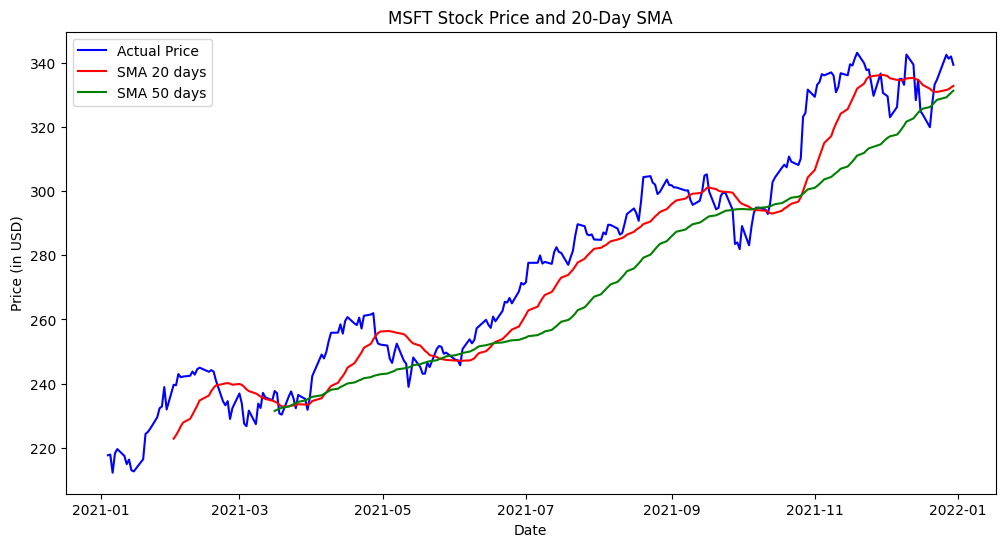

In [ ]:
## Plot Stock Price and SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual Price', color='blue')
plt.plot(stock_data['SMA_20'], label=f'SMA {window_size} days', color='red')
plt.plot(stock_data['SMA_50'], label=f'SMA {window_size_50} days', color='green')
plt.title(f'{symbol} Stock Price and {window_size}-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
The best window size is 55 with a total return of 1.373974526800248


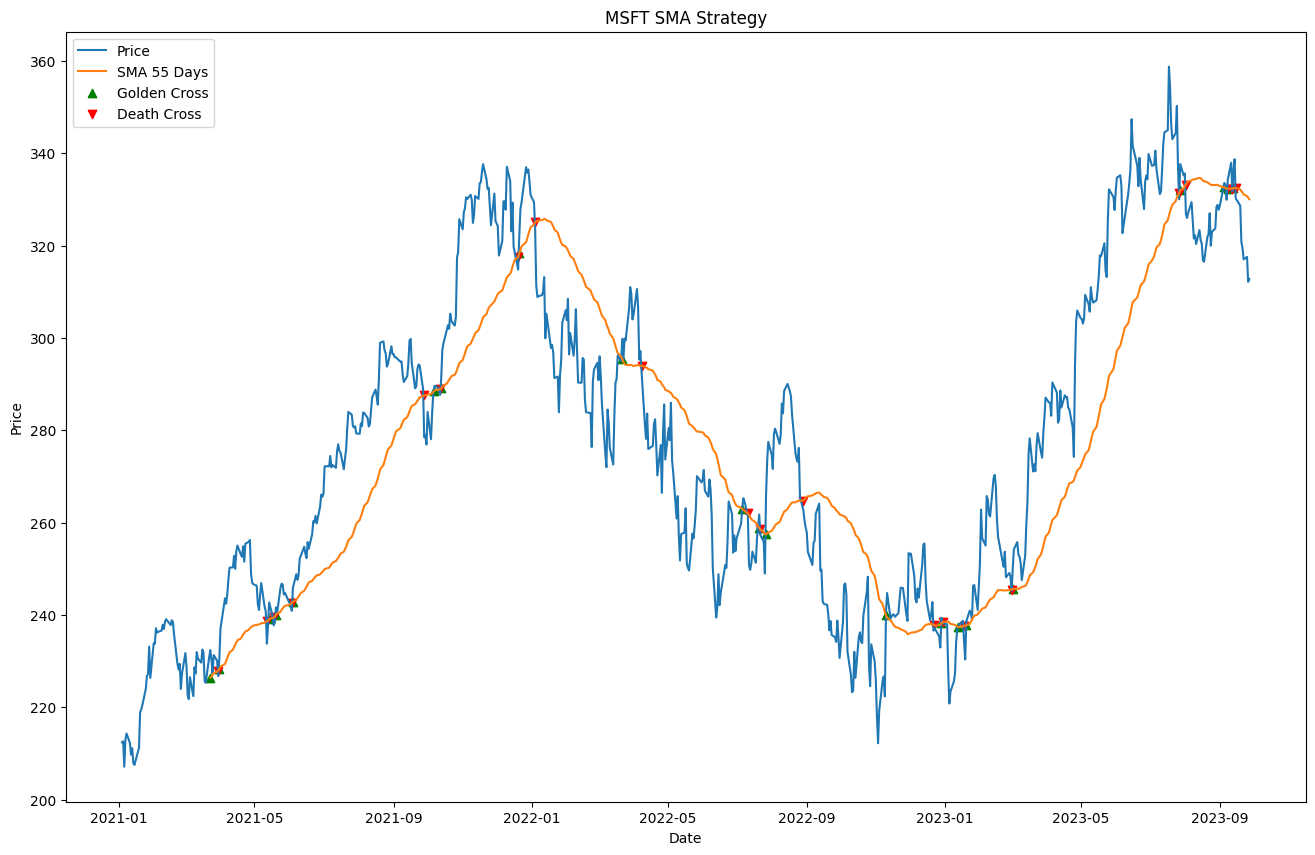

Initial Investment: 10000.00
Final Investment: 13608.44

ROI: 36.08%
Sharpe Ratio: 0.23
CAGR: 36.08%


In [ ]:
class SMAStrategy:
    def __init__(self, ticker, start_date, end_date, initial_investment=10000):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.initial_investment = initial_investment
        self.final_investment = None
        self.data = None
        self.best_window = None

    def fetch_data(self):
        raw = yf.download(self.ticker, start=self.start_date, end=self.end_date).dropna()
        self.data = pd.DataFrame(raw['Adj Close']).rename(columns={'Adj Close': 'Price'})

    def find_best_window(self):
        best_return = -np.inf  # Initialize with a very low value
        best_window = None

        for window in range(10, 61):  # Testing window sizes from 10 to 60
            self.data[f'SMA_{window}'] = self.data['Price'].rolling(window=window).mean()
            self.data['Signal'] = 0.0  # Initialize the signal column
            self.data['Signal'][window:] = np.where(self.data['Price'][window:] > self.data[f'SMA_{window}'][window:], 1.0, 0.0)
            self.data['Daily_Return'] = self.data['Price'].pct_change()
            self.data['Strategy_Return'] = self.data['Signal'].shift(1) * self.data['Daily_Return']

            total_return = (self.data['Strategy_Return'] + 1).prod()
            if total_return > best_return:
                best_return = total_return
                best_window = window

        self.best_window = best_window
        print(f"The best window size is {best_window} with a total return of {best_return}")

    def apply_strategy(self):
        self.data['Position'] = np.where(self.data['Price'] > self.data[f'SMA_{self.best_window}'], 1, -1)
        self.data['Market_Returns'] = np.log(self.data['Price'] / self.data['Price'].shift(1))
        self.data['Strategy_Returns'] = self.data['Position'].shift(1) * self.data['Market_Returns']

        self.cash_available = self.initial_investment
        self.shares_owned = 0

        for i in range(1, len(self.data)):
            position = self.data.iloc[i]['Position']
            current_price = self.data.iloc[i]['Price']

            if position == 1:  # Buy signal
                shares_to_buy = self.cash_available // current_price  # Max shares to buy
                cost = shares_to_buy * current_price
                self.cash_available -= cost
                self.shares_owned += shares_to_buy

            elif position == -1:  # Sell signal
                revenue = self.shares_owned * current_price
                self.cash_available += revenue
                self.shares_owned = 0

            self.final_investment = self.cash_available + self.shares_owned * current_price

        roi, sharpe_ratio, cagr = self.calculate_performance()

        # Plotting
        plt.figure(figsize=(16, 10))
        plt.plot(self.data['Price'], label='Price')
        plt.plot(self.data[f'SMA_{self.best_window}'], label=f'SMA {self.best_window} Days')

        # Adding symbols for golden and death crossovers
        # Create a column to hold day-to-day changes in Position
        self.data['Position_Change'] = self.data['Position'].diff()

        # Plotting the Golden Crosses with a green circle
        plt.scatter(self.data.index[self.data['Position_Change'] == 2],
                    self.data.loc[self.data['Position_Change'] == 2, f'SMA_{self.best_window}'],
                    marker='^', color='g', label='Golden Cross', alpha=1)

        # Plotting the Death Crosses with a red 'x'
        plt.scatter(self.data.index[self.data['Position_Change'] == -2],
                    self.data.loc[self.data['Position_Change'] == -2, f'SMA_{self.best_window}'],
                    marker='v', color='r', label='Death Cross', alpha=1)

        plt.title(f"{self.ticker} SMA Strategy")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        print(f"Initial Investment: {self.initial_investment:.2f}")
        print(f"Final Investment: {self.final_investment:.2f}")
        print()
        print(f"ROI: {roi:.2f}%")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"CAGR: {cagr:.2f}%")

    def calculate_performance(self):
        roi = (self.final_investment - self.initial_investment) / self.initial_investment * 100
        yearly_return = self.data['Strategy_Returns'].mean() * 252
        risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
        risk = self.data['Strategy_Returns'].std() * 252 ** 0.5
        sharpe_ratio = (yearly_return - risk_free_rate) / risk
        cagr = ((self.final_investment / self.initial_investment) ** (1 / (2023 - 2022)) - 1) * 100
        return roi, sharpe_ratio, cagr

if __name__ == '__main__':
    sma_strategy = SMAStrategy('MSFT', '2021-01-01', '2023-09-28')
    sma_strategy.fetch_data()
    sma_strategy.find_best_window()
    sma_strategy.apply_strategy()

## **Performance for MICROSOFT**

[*********************100%%**********************]  1 of 1 completed


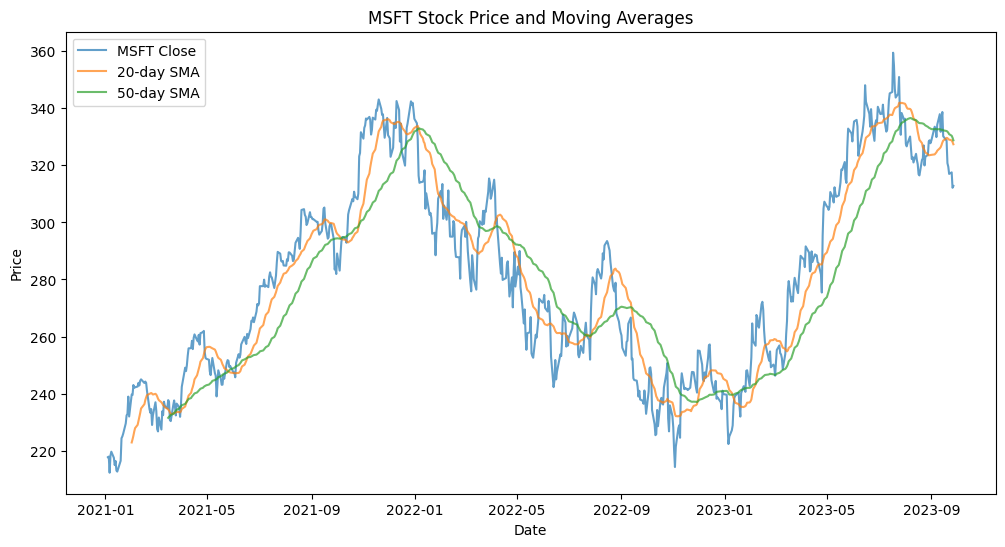

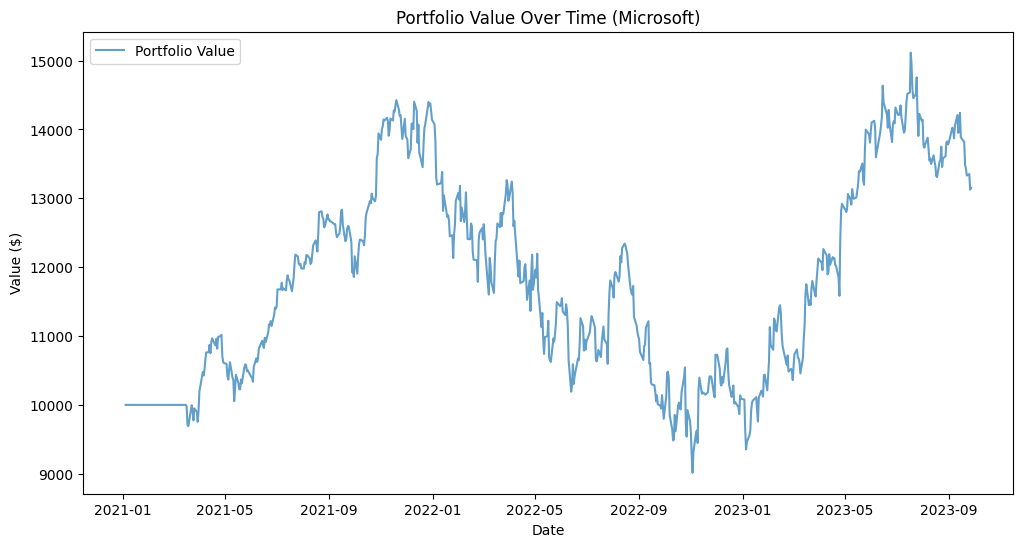

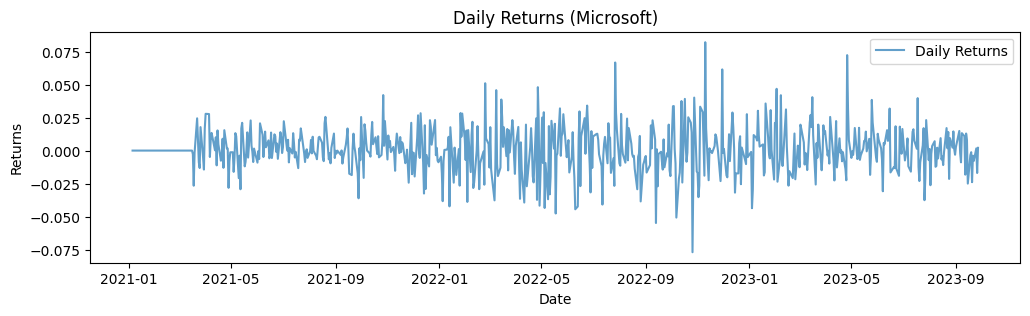

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol
stock_symbol = 'MSFT'

# Download data using yfinance
start_date = '2021-01-01'
end_date = '2023-09-28'

# Download the data for the stock_symbol
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 20-day and 50-day moving averages
short_window = 20
long_window = 50

stock_data['SMA20'] = stock_data['Close'].rolling(window=short_window).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=long_window).mean()

# Create a DataFrame to store the trading signals
signals = pd.DataFrame(index=stock_data.index)
signals['Signal'] = 0.0  # Initialize all signals to 0

# Create a signal when the short-term SMA crosses above the long-term SMA
signals['Signal'][short_window:] = np.where(
    stock_data['SMA20'][short_window:] > stock_data['SMA50'][short_window:], 1.0, 0.0
)

# Initialize capital and position
initial_capital = 10000.0
position = 0
cash = initial_capital

# Implement the trading strategy
portfolio_value = []
for i in range(len(signals)):
    if signals['Signal'][i] == 1.0:  # Buy signal
        if cash > 0:
            shares_to_buy = cash // stock_data['Close'].iloc[i]
            position += shares_to_buy
            cash -= shares_to_buy * stock_data['Close'].iloc[i]
    elif signals['Signal'][i] == -1.0:  # Sell signal
        if position > 0:
            cash += position * stock_data['Close'].iloc[i]
            position = 0

    # Calculate portfolio value at each step
    portfolio_value.append(cash + position * stock_data['Close'].iloc[i])

# Calculate daily returns
returns = pd.Series(portfolio_value).pct_change()

# Plot portfolio value and daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Close', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day SMA', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day SMA', alpha=0.7)
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_value, label='Portfolio Value', alpha=0.7)
plt.title('Portfolio Value Over Time (Microsoft)')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()

plt.figure(figsize=(12, 3))
plt.plot(signals.index, returns, label='Daily Returns', alpha=0.7)
plt.title('Daily Returns (Microsoft)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()


In [ ]:
# Calculate the final portfolio value
MSFT_value = portfolio_value[-1]

# Print the final portfolio value
print(f"Final Portfolio Value: ${MSFT_value:.2f}")


Final Portfolio Value: $13153.36


[*********************100%%**********************]  1 of 1 completed


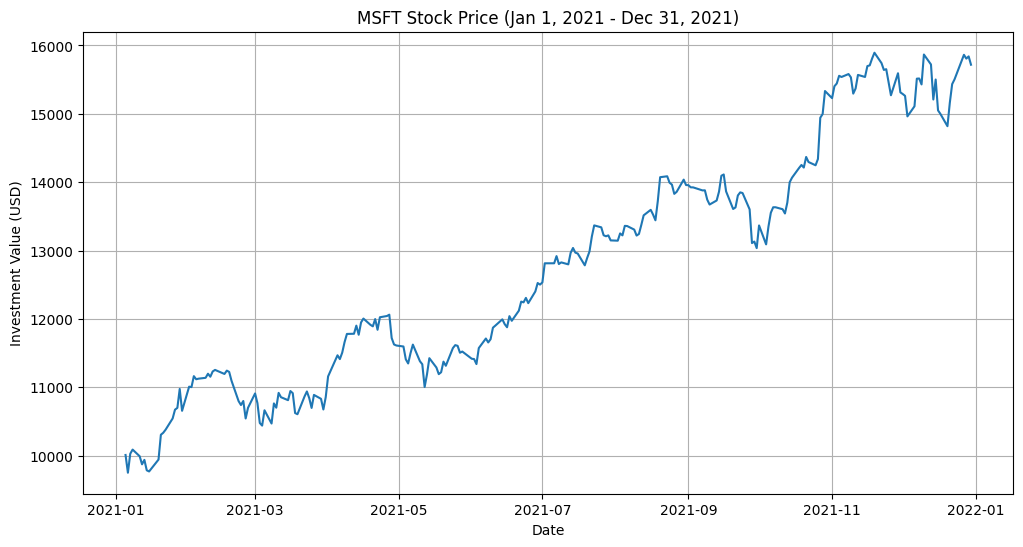

Total investment value on Dec 31, 2021: $15717.96


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbol and the date range
stock_symbol = "MSFT"
start_date = "2021-01-01"
end_date = "2021-12-31"
initial_investment = 10000  # Initial investment amount

# Download the historical data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Calculate the final investment value
final_value = (1 + data['Daily Return']).cumprod() * initial_investment

# Plot the Adjusted Closing Price
plt.figure(figsize=(12, 6))
plt.title(f"{stock_symbol} Stock Price (Jan 1, 2021 - Dec 31, 2021)")
plt.plot(data.index, final_value)
plt.xlabel("Date")
plt.ylabel("Investment Value (USD)")
plt.grid(True)

plt.show()

# Calculate and print the final total value
total_investment_value = final_value[-1]
print(f"Total investment value on Dec 31, 2021: ${total_investment_value:.2f}")


# **Stock 2 AMAZON**

## **SMA for AMAZON**

In [ ]:
## Load Stock Data
symbol = 'AMZN'
stock_data = yf.download(symbol, start='2021-01-01', end='2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
## Calculate Simple Moving Average
def simple_moving_average(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

In [ ]:
window_size = 20  # Using a 20-day SMA
stock_data['SMA_20'] = simple_moving_average(stock_data, window_size)

window_size_50 = 50  # Using a 50-day SMA
stock_data['SMA_50'] = simple_moving_average(stock_data, window_size_50)

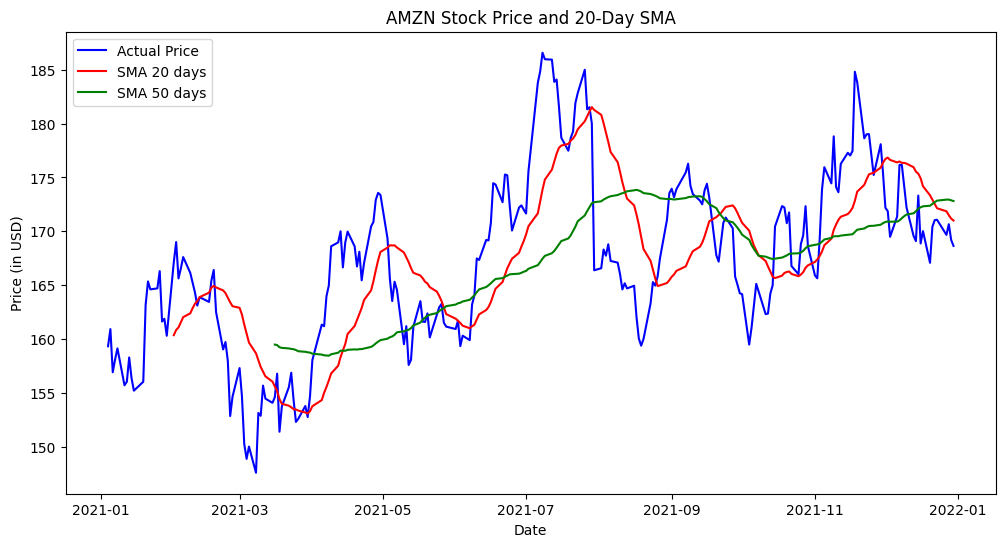

In [ ]:
## Plot Stock Price and SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual Price', color='blue')
plt.plot(stock_data['SMA_20'], label=f'SMA {window_size} days', color='red')
plt.plot(stock_data['SMA_50'], label=f'SMA {window_size_50} days', color='green')
plt.title(f'{symbol} Stock Price and {window_size}-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
The best window size is 17 with a total return of 1.4400759017815967


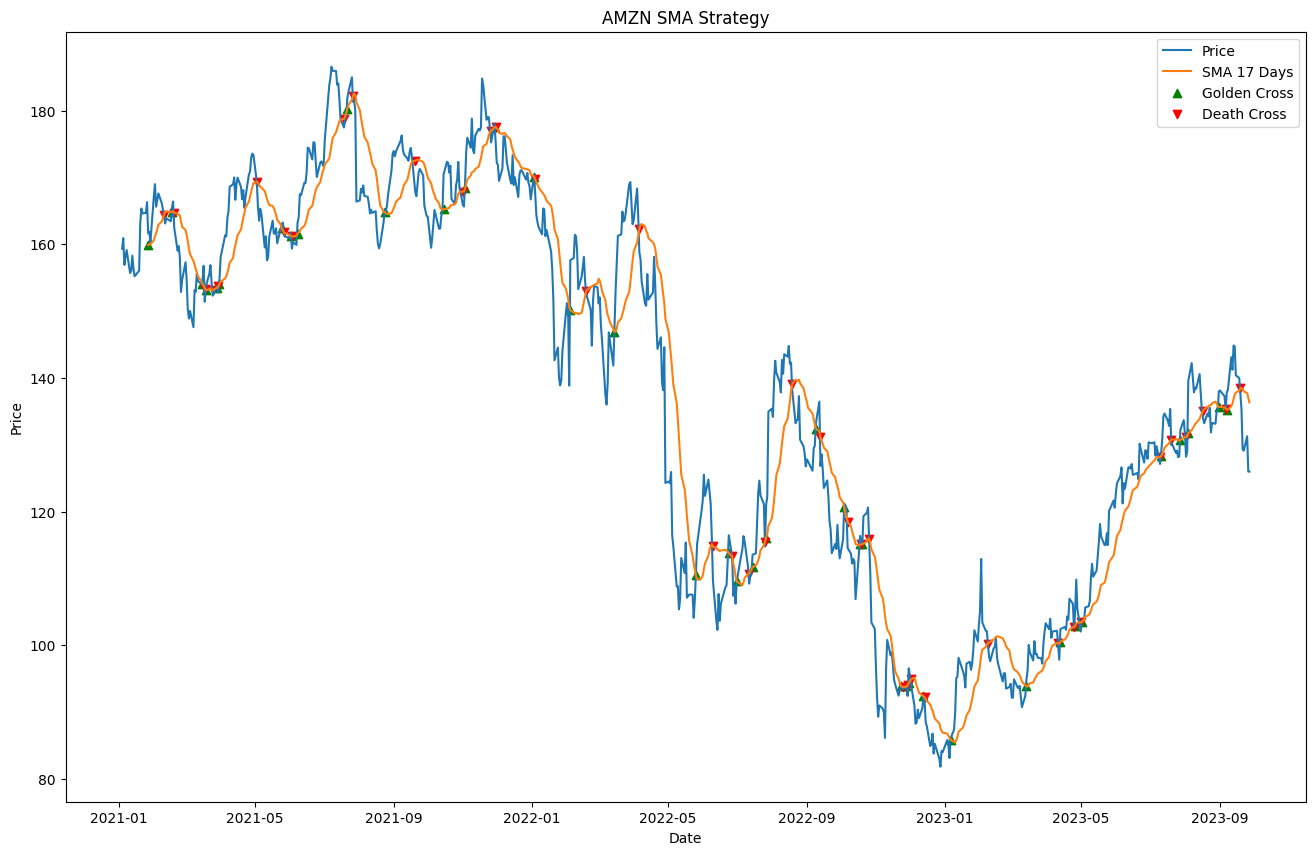

Initial Investment: 10000.00
Final Investment: 14419.86

ROI: 44.20%
Sharpe Ratio: 0.88
CAGR: 44.20%


In [ ]:
class SMAStrategy:
    def __init__(self, ticker, start_date, end_date, initial_investment=10000):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.initial_investment = initial_investment
        self.final_investment = None
        self.data = None
        self.best_window = None

    def fetch_data(self):
        raw = yf.download(self.ticker, start=self.start_date, end=self.end_date).dropna()
        self.data = pd.DataFrame(raw['Adj Close']).rename(columns={'Adj Close': 'Price'})

    def find_best_window(self):
        best_return = -np.inf  # Initialize with a very low value
        best_window = None

        for window in range(10, 61):  # Testing window sizes from 10 to 60
            self.data[f'SMA_{window}'] = self.data['Price'].rolling(window=window).mean()
            self.data['Signal'] = 0.0  # Initialize the signal column
            self.data['Signal'][window:] = np.where(self.data['Price'][window:] > self.data[f'SMA_{window}'][window:], 1.0, 0.0)
            self.data['Daily_Return'] = self.data['Price'].pct_change()
            self.data['Strategy_Return'] = self.data['Signal'].shift(1) * self.data['Daily_Return']

            total_return = (self.data['Strategy_Return'] + 1).prod()
            if total_return > best_return:
                best_return = total_return
                best_window = window

        self.best_window = best_window
        print(f"The best window size is {best_window} with a total return of {best_return}")

    def apply_strategy(self):
        self.data['Position'] = np.where(self.data['Price'] > self.data[f'SMA_{self.best_window}'], 1, -1)
        self.data['Market_Returns'] = np.log(self.data['Price'] / self.data['Price'].shift(1))
        self.data['Strategy_Returns'] = self.data['Position'].shift(1) * self.data['Market_Returns']

        self.cash_available = self.initial_investment
        self.shares_owned = 0

        for i in range(1, len(self.data)):
            position = self.data.iloc[i]['Position']
            current_price = self.data.iloc[i]['Price']

            if position == 1:  # Buy signal
                shares_to_buy = self.cash_available // current_price  # Max shares to buy
                cost = shares_to_buy * current_price
                self.cash_available -= cost
                self.shares_owned += shares_to_buy

            elif position == -1:  # Sell signal
                revenue = self.shares_owned * current_price
                self.cash_available += revenue
                self.shares_owned = 0

            self.final_investment = self.cash_available + self.shares_owned * current_price

        roi, sharpe_ratio, cagr = self.calculate_performance()

        # Plotting
        plt.figure(figsize=(16, 10))
        plt.plot(self.data['Price'], label='Price')
        plt.plot(self.data[f'SMA_{self.best_window}'], label=f'SMA {self.best_window} Days')

        # Adding symbols for golden and death crossovers
        # Create a column to hold day-to-day changes in Position
        self.data['Position_Change'] = self.data['Position'].diff()

        # Plotting the Golden Crosses with a green circle
        plt.scatter(self.data.index[self.data['Position_Change'] == 2],
                    self.data.loc[self.data['Position_Change'] == 2, f'SMA_{self.best_window}'],
                    marker='^', color='g', label='Golden Cross', alpha=1)

        # Plotting the Death Crosses with a red 'x'
        plt.scatter(self.data.index[self.data['Position_Change'] == -2],
                    self.data.loc[self.data['Position_Change'] == -2, f'SMA_{self.best_window}'],
                    marker='v', color='r', label='Death Cross', alpha=1)

        plt.title(f"{self.ticker} SMA Strategy")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        print(f"Initial Investment: {self.initial_investment:.2f}")
        print(f"Final Investment: {self.final_investment:.2f}")
        print()
        print(f"ROI: {roi:.2f}%")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"CAGR: {cagr:.2f}%")

    def calculate_performance(self):
        roi = (self.final_investment - self.initial_investment) / self.initial_investment * 100
        yearly_return = self.data['Strategy_Returns'].mean() * 252
        risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
        risk = self.data['Strategy_Returns'].std() * 252 ** 0.5
        sharpe_ratio = (yearly_return - risk_free_rate) / risk
        cagr = ((self.final_investment / self.initial_investment) ** (1 / (2023 - 2022)) - 1) * 100
        return roi, sharpe_ratio, cagr

if __name__ == '__main__':
    sma_strategy = SMAStrategy('AMZN', '2021-01-01', '2023-09-28')
    sma_strategy.fetch_data()
    sma_strategy.find_best_window()
    sma_strategy.apply_strategy()

## **Performance for AMAZON**

[*********************100%%**********************]  1 of 1 completed


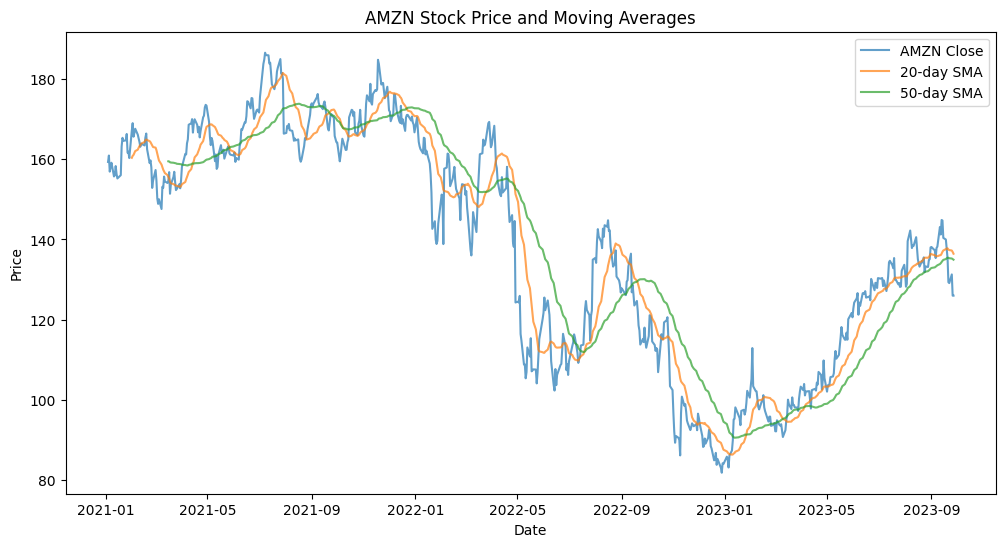

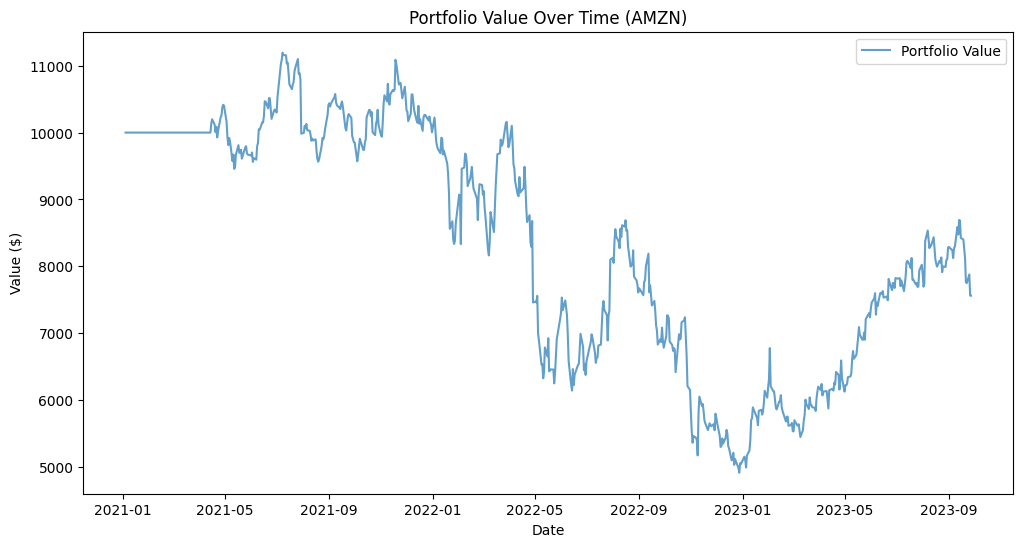

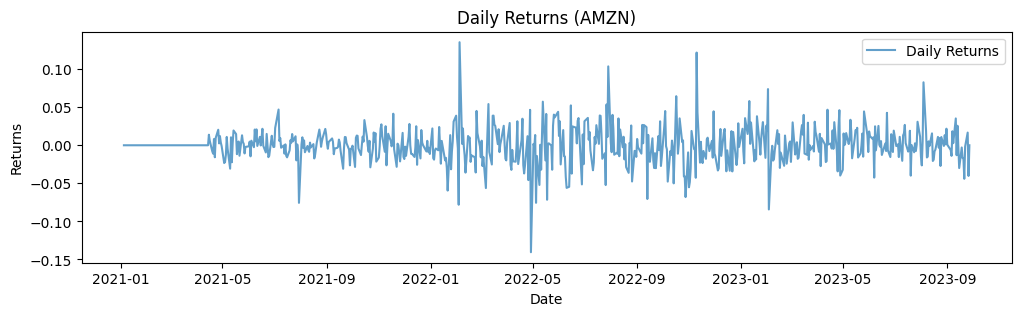

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol
stock_symbol = 'AMZN'

# Download data using yfinance
start_date = '2021-01-01'
end_date = '2023-09-28'

# Download the data for the stock_symbol
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 20-day and 50-day moving averages
short_window = 20
long_window = 50

stock_data['SMA20'] = stock_data['Close'].rolling(window=short_window).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=long_window).mean()

# Create a DataFrame to store the trading signals
signals = pd.DataFrame(index=stock_data.index)
signals['Signal'] = 0.0  # Initialize all signals to 0

# Create a signal when the short-term SMA crosses above the long-term SMA
signals['Signal'][short_window:] = np.where(
    stock_data['SMA20'][short_window:] > stock_data['SMA50'][short_window:], 1.0, 0.0
)

# Initialize capital and position
initial_capital = 10000.0
position = 0
cash = initial_capital

# Implement the trading strategy
portfolio_value = []
for i in range(len(signals)):
    if signals['Signal'][i] == 1.0:  # Buy signal
        if cash > 0:
            shares_to_buy = cash // stock_data['Close'].iloc[i]
            position += shares_to_buy
            cash -= shares_to_buy * stock_data['Close'].iloc[i]
    elif signals['Signal'][i] == -1.0:  # Sell signal
        if position > 0:
            cash += position * stock_data['Close'].iloc[i]
            position = 0

    # Calculate portfolio value at each step
    portfolio_value.append(cash + position * stock_data['Close'].iloc[i])

# Calculate daily returns
returns = pd.Series(portfolio_value).pct_change()

# Plot portfolio value and daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Close', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day SMA', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day SMA', alpha=0.7)
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_value, label='Portfolio Value', alpha=0.7)
plt.title(f'Portfolio Value Over Time ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()

plt.figure(figsize=(12, 3))
plt.plot(signals.index, returns, label='Daily Returns', alpha=0.7)
plt.title(f'Daily Returns ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()


In [ ]:
# Calculate the final portfolio value
AMZN_value = portfolio_value[-1]

# Print the final portfolio value
print(f"Final Portfolio Value: ${AMZN_value:.2f}")


Final Portfolio Value: $7559.80


# **Stock 3 TESLA**

## **SMA for TESLA**

In [ ]:
## Load Stock Data
symbol = 'TSLA'
stock_data = yf.download(symbol, start='2021-01-01', end='2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
## Calculate Simple Moving Average
def simple_moving_average(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

In [ ]:
window_size = 20  # Using a 20-day SMA
stock_data['SMA_20'] = simple_moving_average(stock_data, window_size)

window_size_50 = 50  # Using a 50-day SMA
stock_data['SMA_50'] = simple_moving_average(stock_data, window_size_50)


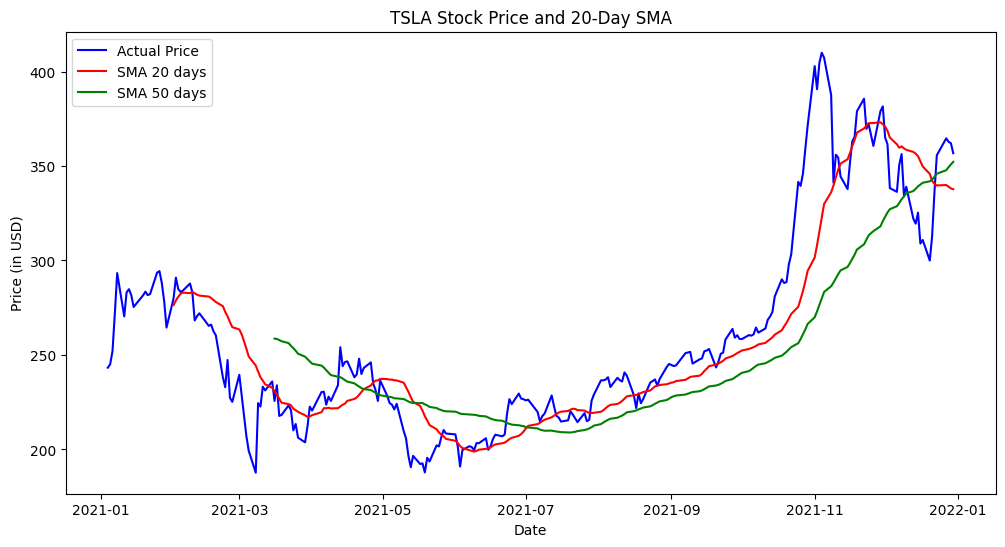

In [ ]:
## Plot Stock Price and SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual Price', color='blue')
plt.plot(stock_data['SMA_20'], label=f'SMA {window_size} days', color='red')
plt.plot(stock_data['SMA_50'], label=f'SMA {window_size_50} days', color='green')
plt.title(f'{symbol} Stock Price and {window_size}-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
The best window size is 26 with a total return of 2.8613769158227957


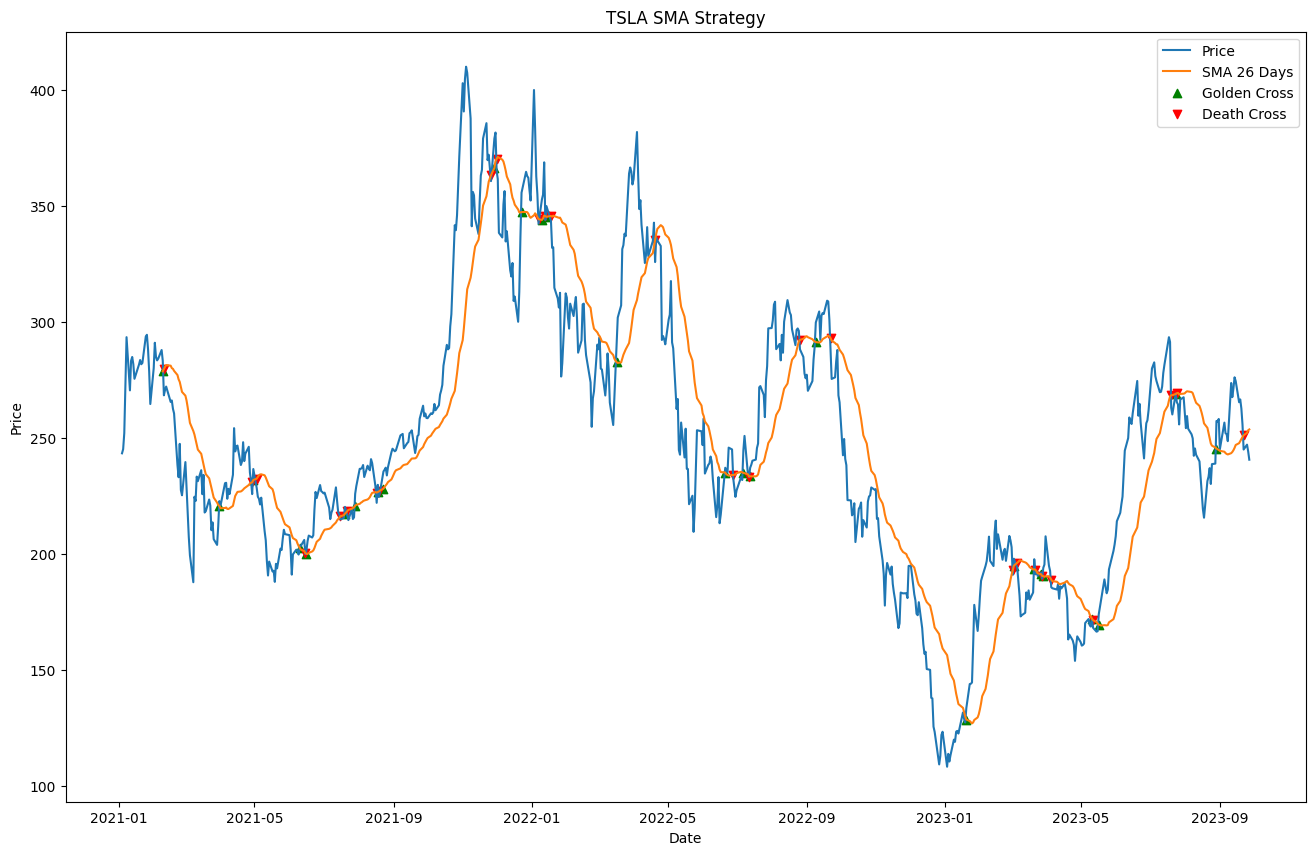

Initial Investment: 10000.00
Final Investment: 26798.42

ROI: 167.98%
Sharpe Ratio: 1.20
CAGR: 167.98%


In [ ]:
class SMAStrategy:
    def __init__(self, ticker, start_date, end_date, initial_investment=10000):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.initial_investment = initial_investment
        self.final_investment = None
        self.data = None
        self.best_window = None

    def fetch_data(self):
        raw = yf.download(self.ticker, start=self.start_date, end=self.end_date).dropna()
        self.data = pd.DataFrame(raw['Adj Close']).rename(columns={'Adj Close': 'Price'})

    def find_best_window(self):
        best_return = -np.inf  # Initialize with a very low value
        best_window = None

        for window in range(10, 61):  # Testing window sizes from 10 to 60
            self.data[f'SMA_{window}'] = self.data['Price'].rolling(window=window).mean()
            self.data['Signal'] = 0.0  # Initialize the signal column
            self.data['Signal'][window:] = np.where(self.data['Price'][window:] > self.data[f'SMA_{window}'][window:], 1.0, 0.0)
            self.data['Daily_Return'] = self.data['Price'].pct_change()
            self.data['Strategy_Return'] = self.data['Signal'].shift(1) * self.data['Daily_Return']

            total_return = (self.data['Strategy_Return'] + 1).prod()
            if total_return > best_return:
                best_return = total_return
                best_window = window

        self.best_window = best_window
        print(f"The best window size is {best_window} with a total return of {best_return}")

    def apply_strategy(self):
        self.data['Position'] = np.where(self.data['Price'] > self.data[f'SMA_{self.best_window}'], 1, -1)
        self.data['Market_Returns'] = np.log(self.data['Price'] / self.data['Price'].shift(1))
        self.data['Strategy_Returns'] = self.data['Position'].shift(1) * self.data['Market_Returns']

        self.cash_available = self.initial_investment
        self.shares_owned = 0

        for i in range(1, len(self.data)):
            position = self.data.iloc[i]['Position']
            current_price = self.data.iloc[i]['Price']

            if position == 1:  # Buy signal
                shares_to_buy = self.cash_available // current_price  # Max shares to buy
                cost = shares_to_buy * current_price
                self.cash_available -= cost
                self.shares_owned += shares_to_buy

            elif position == -1:  # Sell signal
                revenue = self.shares_owned * current_price
                self.cash_available += revenue
                self.shares_owned = 0

            self.final_investment = self.cash_available + self.shares_owned * current_price

        roi, sharpe_ratio, cagr = self.calculate_performance()

        # Plotting
        plt.figure(figsize=(16, 10))
        plt.plot(self.data['Price'], label='Price')
        plt.plot(self.data[f'SMA_{self.best_window}'], label=f'SMA {self.best_window} Days')

        # Adding symbols for golden and death crossovers
        # Create a column to hold day-to-day changes in Position
        self.data['Position_Change'] = self.data['Position'].diff()

        # Plotting the Golden Crosses with a green circle
        plt.scatter(self.data.index[self.data['Position_Change'] == 2],
                    self.data.loc[self.data['Position_Change'] == 2, f'SMA_{self.best_window}'],
                    marker='^', color='g', label='Golden Cross', alpha=1)

        # Plotting the Death Crosses with a red 'x'
        plt.scatter(self.data.index[self.data['Position_Change'] == -2],
                    self.data.loc[self.data['Position_Change'] == -2, f'SMA_{self.best_window}'],
                    marker='v', color='r', label='Death Cross', alpha=1)

        plt.title(f"{self.ticker} SMA Strategy")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        print(f"Initial Investment: {self.initial_investment:.2f}")
        print(f"Final Investment: {self.final_investment:.2f}")
        print()
        print(f"ROI: {roi:.2f}%")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"CAGR: {cagr:.2f}%")

    def calculate_performance(self):
        roi = (self.final_investment - self.initial_investment) / self.initial_investment * 100
        yearly_return = self.data['Strategy_Returns'].mean() * 252
        risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
        risk = self.data['Strategy_Returns'].std() * 252 ** 0.5
        sharpe_ratio = (yearly_return - risk_free_rate) / risk
        cagr = ((self.final_investment / self.initial_investment) ** (1 / (2023 - 2022)) - 1) * 100
        return roi, sharpe_ratio, cagr

if __name__ == '__main__':
    sma_strategy = SMAStrategy('TSLA', '2021-01-01', '2023-09-28')
    sma_strategy.fetch_data()
    sma_strategy.find_best_window()
    sma_strategy.apply_strategy()

## **Performance fro TESLA**

[*********************100%%**********************]  1 of 1 completed


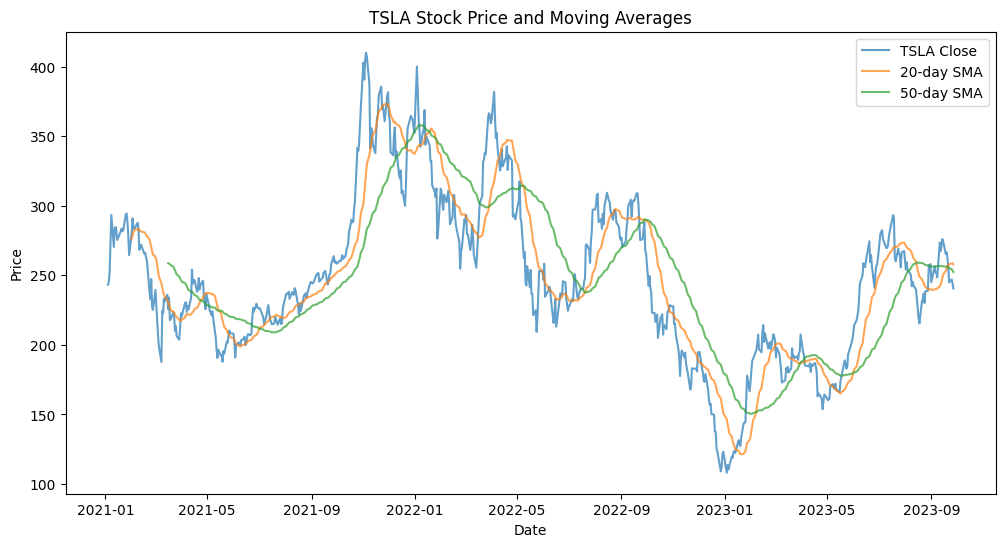

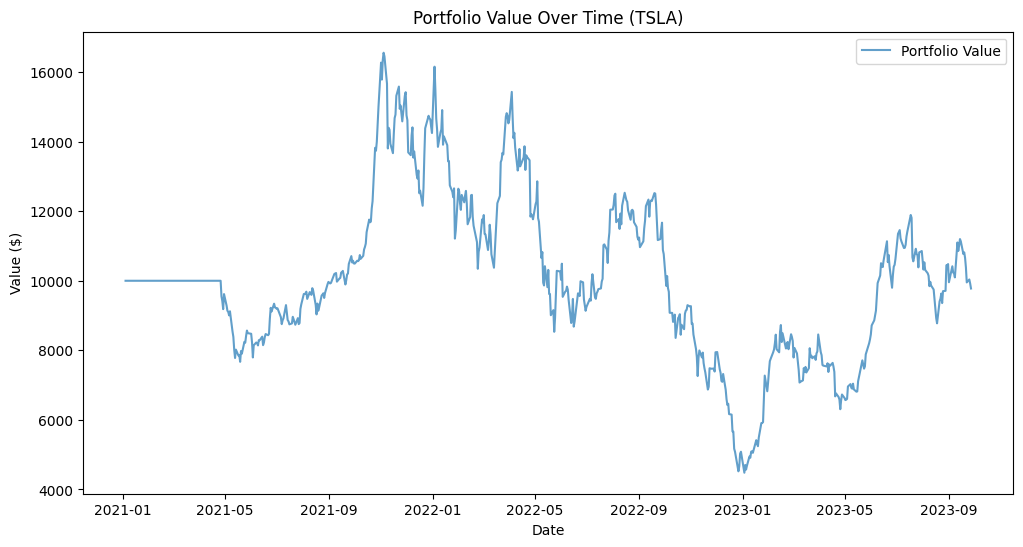

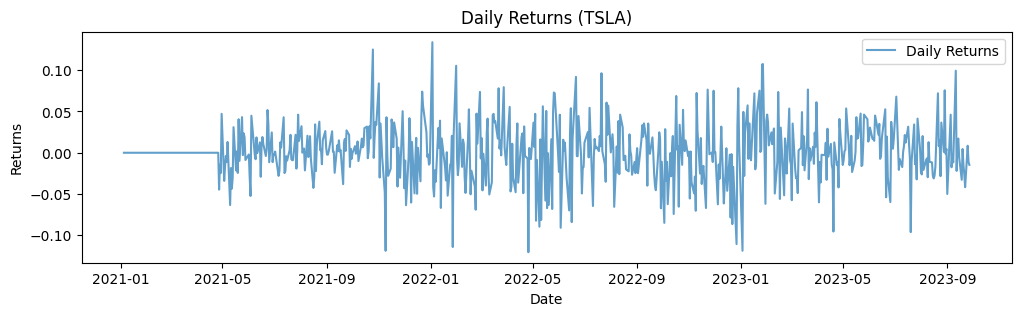

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol
stock_symbol = 'TSLA'

# Download data using yfinance
start_date = '2021-01-01'
end_date = '2023-09-28'

# Download the data for the stock_symbol
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 20-day and 50-day moving averages
short_window = 20
long_window = 50

stock_data['SMA20'] = stock_data['Close'].rolling(window=short_window).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=long_window).mean()

# Create a DataFrame to store the trading signals
signals = pd.DataFrame(index=stock_data.index)
signals['Signal'] = 0.0  # Initialize all signals to 0

# Create a signal when the short-term SMA crosses above the long-term SMA
signals['Signal'][short_window:] = np.where(
    stock_data['SMA20'][short_window:] > stock_data['SMA50'][short_window:], 1.0, 0.0
)

# Initialize capital and position
initial_capital = 10000.0  # Updated initial capital to $10,000
position = 0
cash = initial_capital

# Implement the trading strategy
portfolio_value = []
for i in range(len(signals)):
    if signals['Signal'][i] == 1.0:  # Buy signal
        if cash > 0:
            shares_to_buy = cash // stock_data['Close'].iloc[i]
            position += shares_to_buy
            cash -= shares_to_buy * stock_data['Close'].iloc[i]
    elif signals['Signal'][i] == -1.0:  # Sell signal
        if position > 0:
            cash += position * stock_data['Close'].iloc[i]
            position = 0

    # Calculate portfolio value at each step
    portfolio_value.append(cash + position * stock_data['Close'].iloc[i])

# Calculate daily returns
returns = pd.Series(portfolio_value).pct_change()

# Plot portfolio value and daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Close', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day SMA', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day SMA', alpha=0.7)
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_value, label='Portfolio Value', alpha=0.7)
plt.title(f'Portfolio Value Over Time ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()

plt.figure(figsize=(12, 3))
plt.plot(signals.index, returns, label='Daily Returns', alpha=0.7)
plt.title(f'Daily Returns ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()


In [ ]:
# Calculate the final portfolio value
TSLA_value = portfolio_value[-1]

# Print the final portfolio value
print(f"Final Portfolio Value: ${TSLA_value:.2f}")


Final Portfolio Value: $9777.33


# **Stock 4 GOOGLE**

## **SMA for GOOGLE**

In [ ]:
## Load Stock Data
symbol = 'GOOGL'
stock_data = yf.download(symbol, start='2021-01-01', end='2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
## Calculate Simple Moving Average
def simple_moving_average(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

In [ ]:
window_size = 20  # Using a 20-day SMA
stock_data['SMA_20'] = simple_moving_average(stock_data, window_size)

window_size_50 = 50  # Using a 50-day SMA
stock_data['SMA_50'] = simple_moving_average(stock_data, window_size_50)


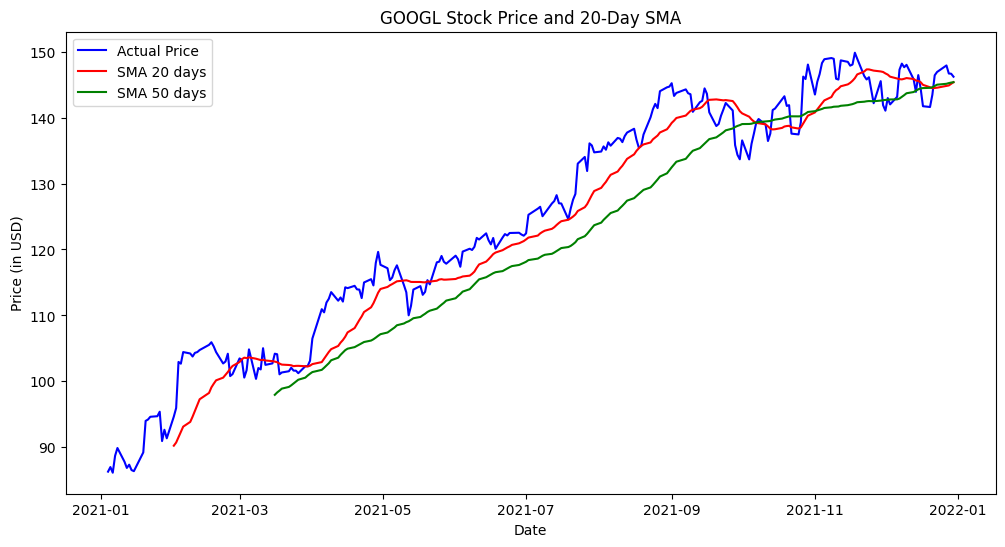

In [ ]:
## Plot Stock Price and SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual Price', color='blue')
plt.plot(stock_data['SMA_20'], label=f'SMA {window_size} days', color='red')
plt.plot(stock_data['SMA_50'], label=f'SMA {window_size_50} days', color='green')
plt.title(f'{symbol} Stock Price and {window_size}-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
The best window size is 20 with a total return of 1.2396814377632865


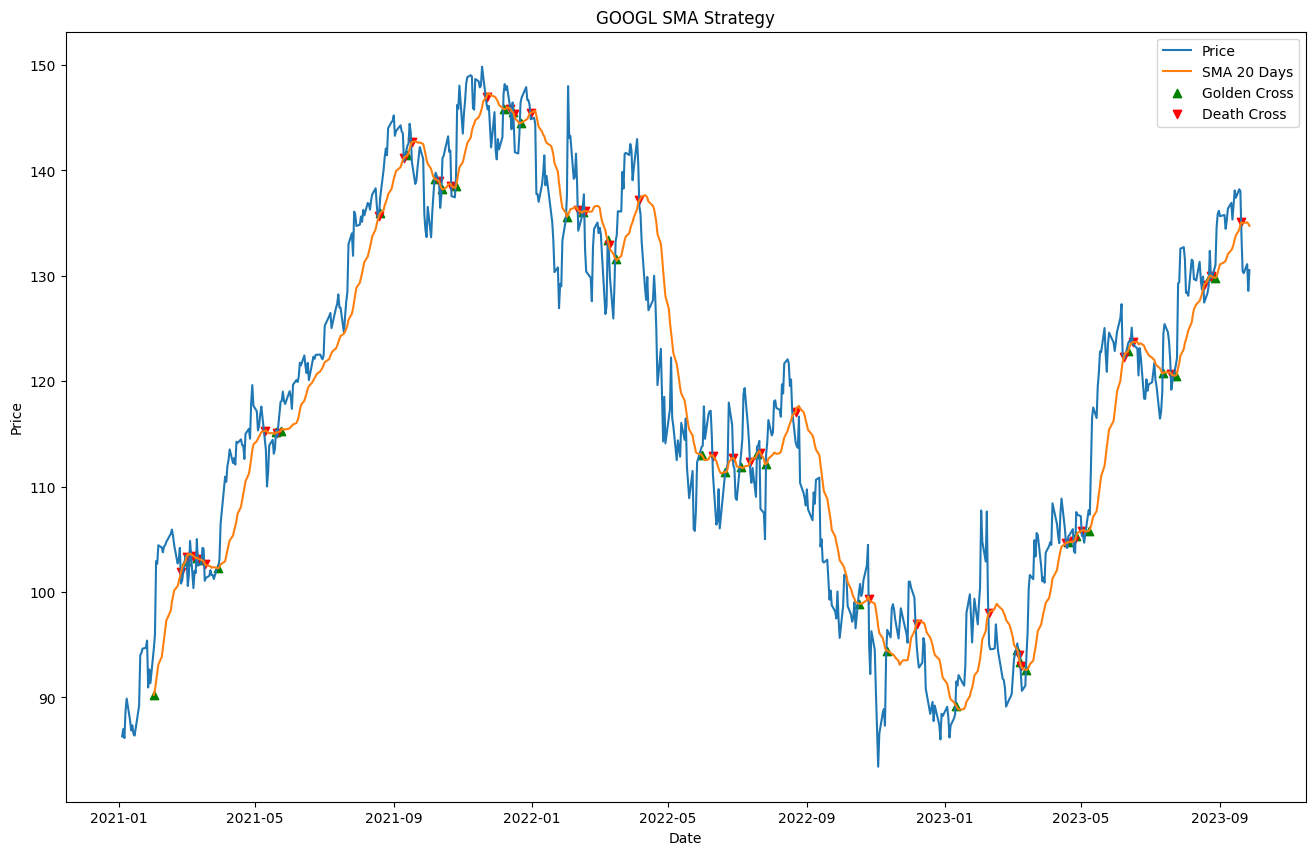

Initial Investment: 10000.00
Final Investment: 12557.61

ROI: 25.58%
Sharpe Ratio: -0.01
CAGR: 25.58%


In [ ]:
class SMAStrategy:
    def __init__(self, ticker, start_date, end_date, initial_investment=10000):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.initial_investment = initial_investment
        self.final_investment = None
        self.data = None
        self.best_window = None

    def fetch_data(self):
        raw = yf.download(self.ticker, start=self.start_date, end=self.end_date).dropna()
        self.data = pd.DataFrame(raw['Adj Close']).rename(columns={'Adj Close': 'Price'})

    def find_best_window(self):
        best_return = -np.inf  # Initialize with a very low value
        best_window = None

        for window in range(10, 61):  # Testing window sizes from 10 to 60
            self.data[f'SMA_{window}'] = self.data['Price'].rolling(window=window).mean()
            self.data['Signal'] = 0.0  # Initialize the signal column
            self.data['Signal'][window:] = np.where(self.data['Price'][window:] > self.data[f'SMA_{window}'][window:], 1.0, 0.0)
            self.data['Daily_Return'] = self.data['Price'].pct_change()
            self.data['Strategy_Return'] = self.data['Signal'].shift(1) * self.data['Daily_Return']

            total_return = (self.data['Strategy_Return'] + 1).prod()
            if total_return > best_return:
                best_return = total_return
                best_window = window

        self.best_window = best_window
        print(f"The best window size is {best_window} with a total return of {best_return}")

    def apply_strategy(self):
        self.data['Position'] = np.where(self.data['Price'] > self.data[f'SMA_{self.best_window}'], 1, -1)
        self.data['Market_Returns'] = np.log(self.data['Price'] / self.data['Price'].shift(1))
        self.data['Strategy_Returns'] = self.data['Position'].shift(1) * self.data['Market_Returns']

        self.cash_available = self.initial_investment
        self.shares_owned = 0

        for i in range(1, len(self.data)):
            position = self.data.iloc[i]['Position']
            current_price = self.data.iloc[i]['Price']

            if position == 1:  # Buy signal
                shares_to_buy = self.cash_available // current_price  # Max shares to buy
                cost = shares_to_buy * current_price
                self.cash_available -= cost
                self.shares_owned += shares_to_buy

            elif position == -1:  # Sell signal
                revenue = self.shares_owned * current_price
                self.cash_available += revenue
                self.shares_owned = 0

            self.final_investment = self.cash_available + self.shares_owned * current_price

        roi, sharpe_ratio, cagr = self.calculate_performance()

        # Plotting
        plt.figure(figsize=(16, 10))
        plt.plot(self.data['Price'], label='Price')
        plt.plot(self.data[f'SMA_{self.best_window}'], label=f'SMA {self.best_window} Days')

        # Adding symbols for golden and death crossovers
        # Create a column to hold day-to-day changes in Position
        self.data['Position_Change'] = self.data['Position'].diff()

        # Plotting the Golden Crosses with a green circle
        plt.scatter(self.data.index[self.data['Position_Change'] == 2],
                    self.data.loc[self.data['Position_Change'] == 2, f'SMA_{self.best_window}'],
                    marker='^', color='g', label='Golden Cross', alpha=1)

        # Plotting the Death Crosses with a red 'x'
        plt.scatter(self.data.index[self.data['Position_Change'] == -2],
                    self.data.loc[self.data['Position_Change'] == -2, f'SMA_{self.best_window}'],
                    marker='v', color='r', label='Death Cross', alpha=1)

        plt.title(f"{self.ticker} SMA Strategy")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        print(f"Initial Investment: {self.initial_investment:.2f}")
        print(f"Final Investment: {self.final_investment:.2f}")
        print()
        print(f"ROI: {roi:.2f}%")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"CAGR: {cagr:.2f}%")

    def calculate_performance(self):
        roi = (self.final_investment - self.initial_investment) / self.initial_investment * 100
        yearly_return = self.data['Strategy_Returns'].mean() * 252
        risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
        risk = self.data['Strategy_Returns'].std() * 252 ** 0.5
        sharpe_ratio = (yearly_return - risk_free_rate) / risk
        cagr = ((self.final_investment / self.initial_investment) ** (1 / (2023 - 2022)) - 1) * 100
        return roi, sharpe_ratio, cagr

if __name__ == '__main__':
    sma_strategy = SMAStrategy('GOOGL', '2021-01-01', '2023-09-28')
    sma_strategy.fetch_data()
    sma_strategy.find_best_window()
    sma_strategy.apply_strategy()

## **Performance for GOOGLE**

[*********************100%%**********************]  1 of 1 completed


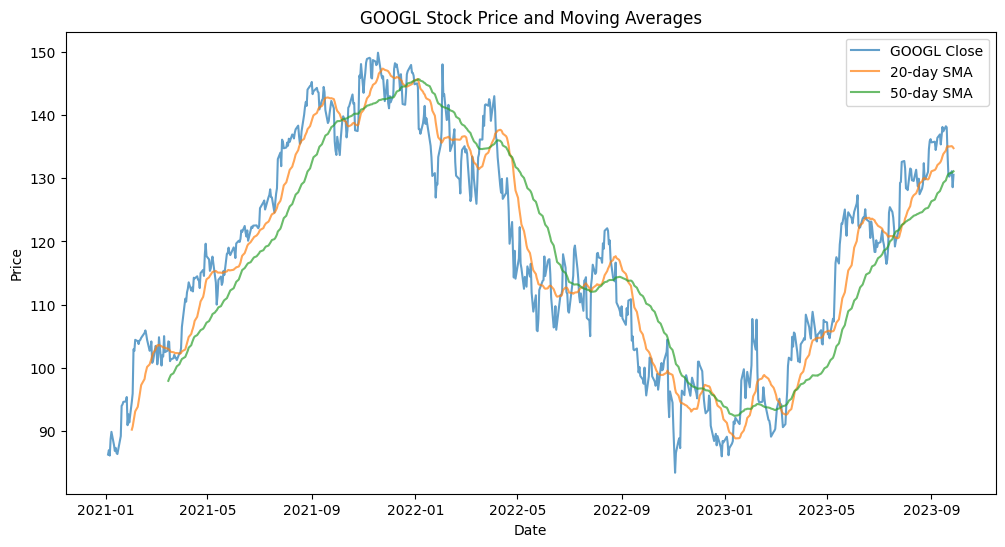

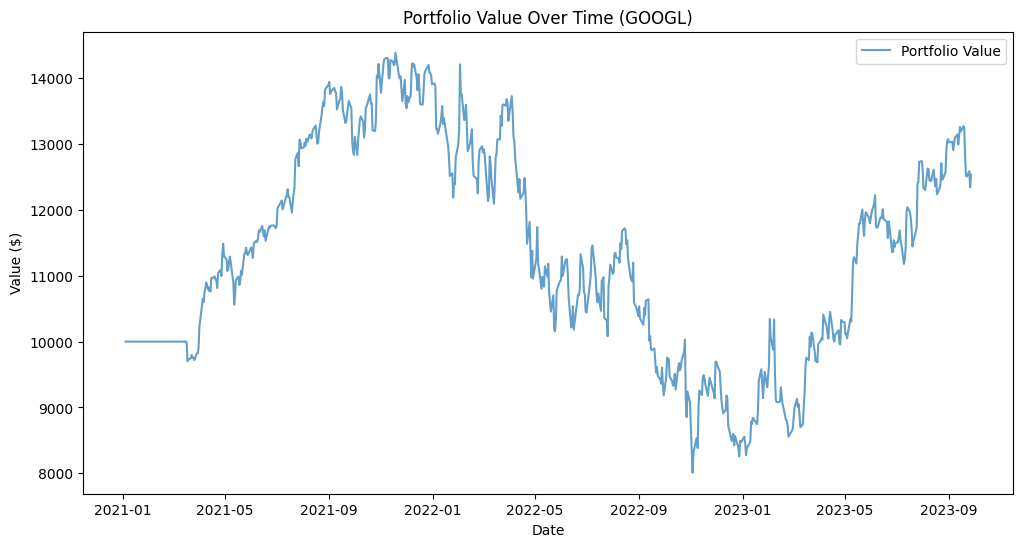

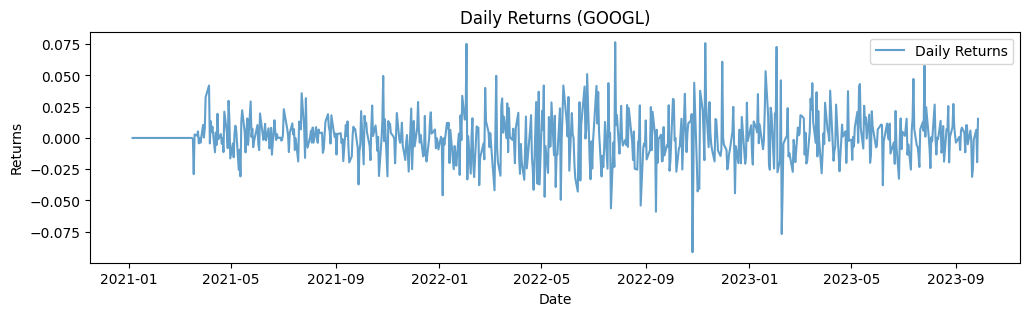

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol
stock_symbol = 'GOOGL'

# Download data using yfinance
start_date = '2021-01-01'
end_date = '2023-09-28'

# Download the data for the stock_symbol
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 20-day and 50-day moving averages
short_window = 20
long_window = 50

stock_data['SMA20'] = stock_data['Close'].rolling(window=short_window).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=long_window).mean()

# Create a DataFrame to store the trading signals
signals = pd.DataFrame(index=stock_data.index)
signals['Signal'] = 0.0  # Initialize all signals to 0

# Create a signal when the short-term SMA crosses above the long-term SMA
signals['Signal'][short_window:] = np.where(
    stock_data['SMA20'][short_window:] > stock_data['SMA50'][short_window:], 1.0, 0.0
)

# Initialize capital and position
initial_capital = 10000.0  # Updated initial capital to $10,000
position = 0
cash = initial_capital

# Implement the trading strategy
portfolio_value = []
for i in range(len(signals)):
    if signals['Signal'][i] == 1.0:  # Buy signal
        if cash > 0:
            shares_to_buy = cash // stock_data['Close'].iloc[i]
            position += shares_to_buy
            cash -= shares_to_buy * stock_data['Close'].iloc[i]
    elif signals['Signal'][i] == -1.0:  # Sell signal
        if position > 0:
            cash += position * stock_data['Close'].iloc[i]
            position = 0

    # Calculate portfolio value at each step
    portfolio_value.append(cash + position * stock_data['Close'].iloc[i])

# Calculate daily returns
returns = pd.Series(portfolio_value).pct_change()

# Plot portfolio value and daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Close', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day SMA', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day SMA', alpha=0.7)
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_value, label='Portfolio Value', alpha=0.7)
plt.title(f'Portfolio Value Over Time ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()

plt.figure(figsize=(12, 3))
plt.plot(signals.index, returns, label='Daily Returns', alpha=0.7)
plt.title(f'Daily Returns ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()


In [ ]:
# Calculate the final portfolio value
GOOGL_value = portfolio_value[-1]

# Print the final portfolio value
print(f"Final Portfolio Value: ${GOOGL_value:.2f}")


Final Portfolio Value: $12532.29


# **Stack 5 JOHNSON AND JOHNSON**

## **SMA for JOHNSON AND JOHNSON**

In [ ]:
## Load Stock Data
symbol = 'JNJ'
stock_data = yf.download(symbol, start='2021-01-01', end='2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
## Calculate Simple Moving Average
def simple_moving_average(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

In [ ]:
window_size = 20  # Using a 20-day SMA
stock_data['SMA_20'] = simple_moving_average(stock_data, window_size)

window_size_50 = 50  # Using a 50-day SMA
stock_data['SMA_50'] = simple_moving_average(stock_data, window_size_50)


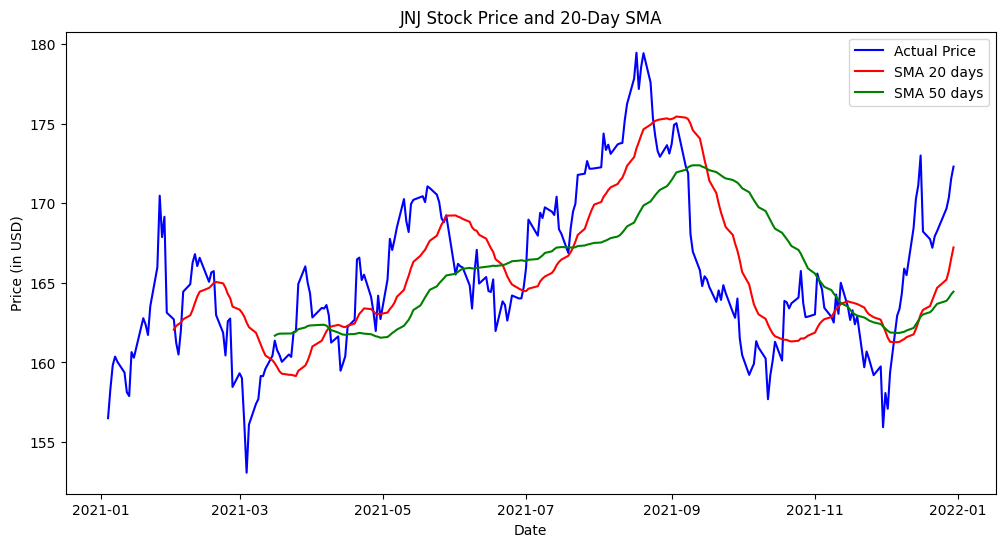

In [ ]:
## Plot Stock Price and SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual Price', color='blue')
plt.plot(stock_data['SMA_20'], label=f'SMA {window_size} days', color='red')
plt.plot(stock_data['SMA_50'], label=f'SMA {window_size_50} days', color='green')
plt.title(f'{symbol} Stock Price and {window_size}-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
The best window size is 25 with a total return of 1.0729456190942948


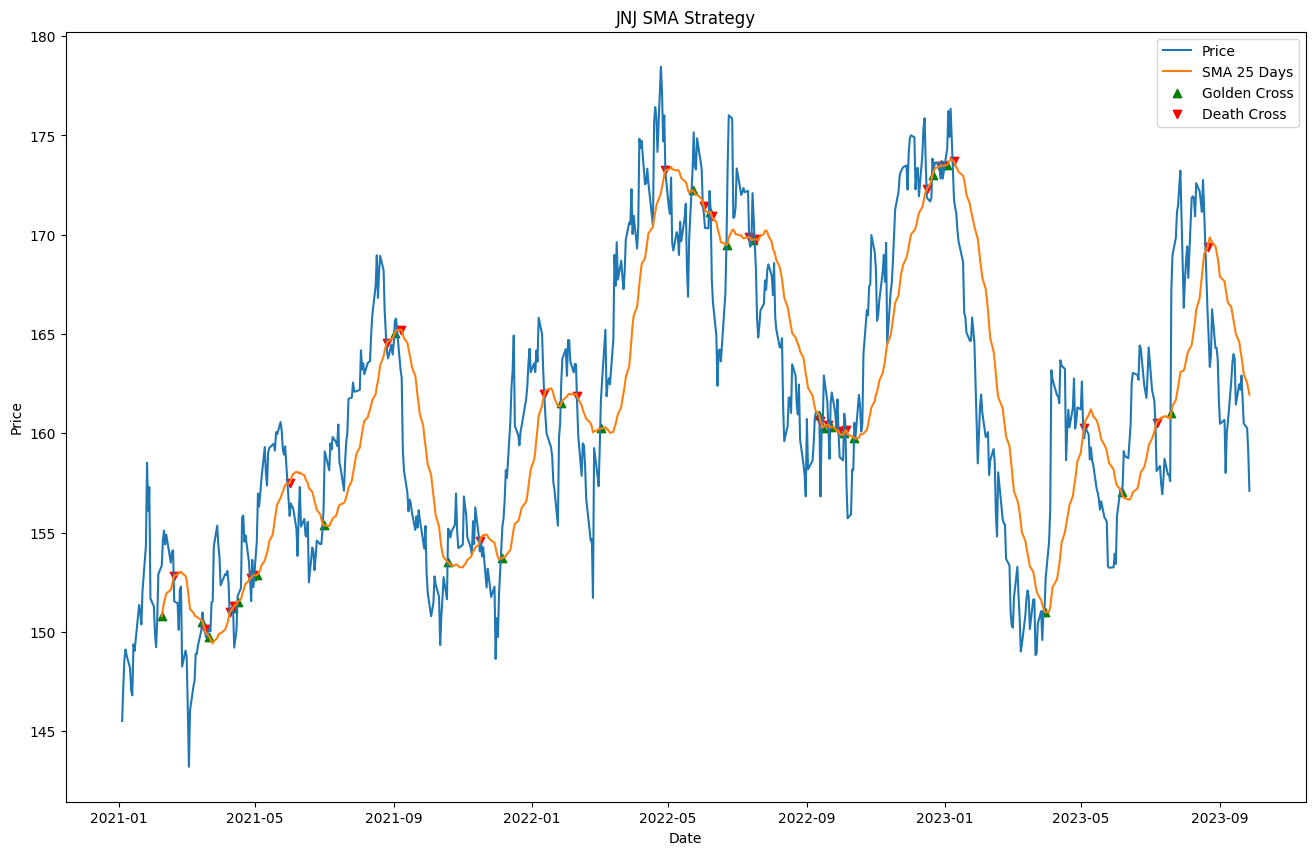

Initial Investment: 10000.00
Final Investment: 10814.66

ROI: 8.15%
Sharpe Ratio: 0.06
CAGR: 8.15%


In [ ]:
class SMAStrategy:
    def __init__(self, ticker, start_date, end_date, initial_investment=10000):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.initial_investment = initial_investment
        self.final_investment = None
        self.data = None
        self.best_window = None

    def fetch_data(self):
        raw = yf.download(self.ticker, start=self.start_date, end=self.end_date).dropna()
        self.data = pd.DataFrame(raw['Adj Close']).rename(columns={'Adj Close': 'Price'})

    def find_best_window(self):
        best_return = -np.inf  # Initialize with a very low value
        best_window = None

        for window in range(10, 61):  # Testing window sizes from 10 to 60
            self.data[f'SMA_{window}'] = self.data['Price'].rolling(window=window).mean()
            self.data['Signal'] = 0.0  # Initialize the signal column
            self.data['Signal'][window:] = np.where(self.data['Price'][window:] > self.data[f'SMA_{window}'][window:], 1.0, 0.0)
            self.data['Daily_Return'] = self.data['Price'].pct_change()
            self.data['Strategy_Return'] = self.data['Signal'].shift(1) * self.data['Daily_Return']

            total_return = (self.data['Strategy_Return'] + 1).prod()
            if total_return > best_return:
                best_return = total_return
                best_window = window

        self.best_window = best_window
        print(f"The best window size is {best_window} with a total return of {best_return}")

    def apply_strategy(self):
        self.data['Position'] = np.where(self.data['Price'] > self.data[f'SMA_{self.best_window}'], 1, -1)
        self.data['Market_Returns'] = np.log(self.data['Price'] / self.data['Price'].shift(1))
        self.data['Strategy_Returns'] = self.data['Position'].shift(1) * self.data['Market_Returns']

        self.cash_available = self.initial_investment
        self.shares_owned = 0

        for i in range(1, len(self.data)):
            position = self.data.iloc[i]['Position']
            current_price = self.data.iloc[i]['Price']

            if position == 1:  # Buy signal
                shares_to_buy = self.cash_available // current_price  # Max shares to buy
                cost = shares_to_buy * current_price
                self.cash_available -= cost
                self.shares_owned += shares_to_buy

            elif position == -1:  # Sell signal
                revenue = self.shares_owned * current_price
                self.cash_available += revenue
                self.shares_owned = 0

            self.final_investment = self.cash_available + self.shares_owned * current_price

        roi, sharpe_ratio, cagr = self.calculate_performance()

        # Plotting
        plt.figure(figsize=(16, 10))
        plt.plot(self.data['Price'], label='Price')
        plt.plot(self.data[f'SMA_{self.best_window}'], label=f'SMA {self.best_window} Days')

        # Adding symbols for golden and death crossovers
        # Create a column to hold day-to-day changes in Position
        self.data['Position_Change'] = self.data['Position'].diff()

        # Plotting the Golden Crosses with a green circle
        plt.scatter(self.data.index[self.data['Position_Change'] == 2],
                    self.data.loc[self.data['Position_Change'] == 2, f'SMA_{self.best_window}'],
                    marker='^', color='g', label='Golden Cross', alpha=1)

        # Plotting the Death Crosses with a red 'x'
        plt.scatter(self.data.index[self.data['Position_Change'] == -2],
                    self.data.loc[self.data['Position_Change'] == -2, f'SMA_{self.best_window}'],
                    marker='v', color='r', label='Death Cross', alpha=1)

        plt.title(f"{self.ticker} SMA Strategy")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        print(f"Initial Investment: {self.initial_investment:.2f}")
        print(f"Final Investment: {self.final_investment:.2f}")
        print()
        print(f"ROI: {roi:.2f}%")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"CAGR: {cagr:.2f}%")

    def calculate_performance(self):
        roi = (self.final_investment - self.initial_investment) / self.initial_investment * 100
        yearly_return = self.data['Strategy_Returns'].mean() * 252
        risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
        risk = self.data['Strategy_Returns'].std() * 252 ** 0.5
        sharpe_ratio = (yearly_return - risk_free_rate) / risk
        cagr = ((self.final_investment / self.initial_investment) ** (1 / (2023 - 2022)) - 1) * 100
        return roi, sharpe_ratio, cagr

if __name__ == '__main__':
    sma_strategy = SMAStrategy('JNJ', '2021-01-01', '2023-09-28')
    sma_strategy.fetch_data()
    sma_strategy.find_best_window()
    sma_strategy.apply_strategy()

## **Performance for JOHNSON AND JOHNSON**

[*********************100%%**********************]  1 of 1 completed


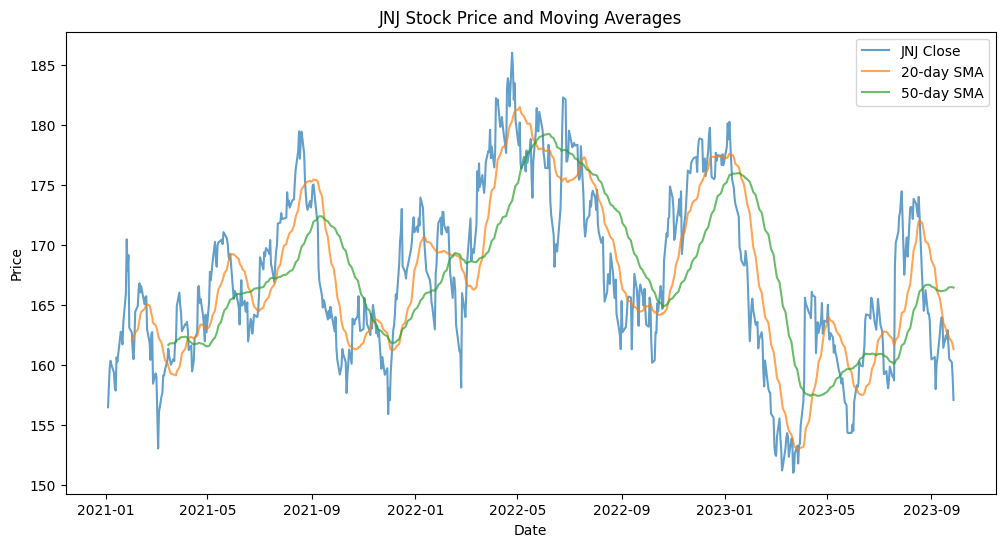

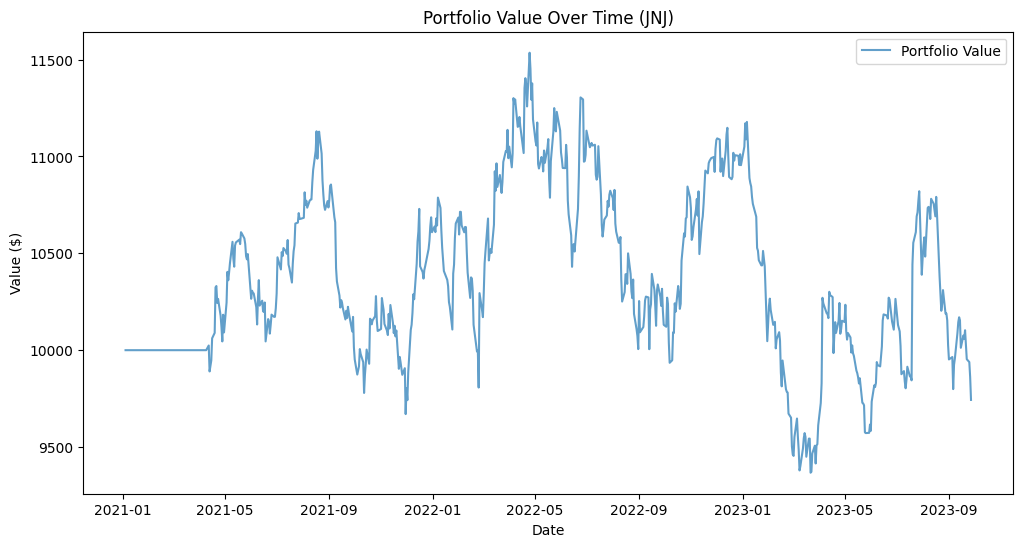

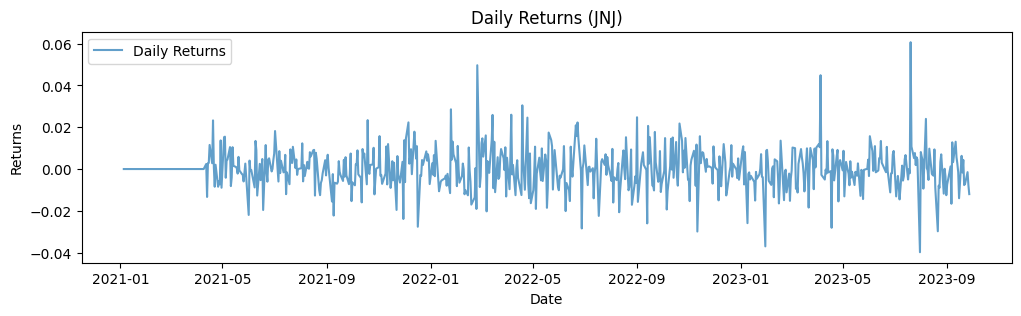

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol
stock_symbol = 'JNJ'

# Download data using yfinance
start_date = '2021-01-01'
end_date = '2023-09-28'

# Download the data for the stock_symbol
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 20-day and 50-day moving averages
short_window = 20
long_window = 50

stock_data['SMA20'] = stock_data['Close'].rolling(window=short_window).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=long_window).mean()

# Create a DataFrame to store the trading signals
signals = pd.DataFrame(index=stock_data.index)
signals['Signal'] = 0.0  # Initialize all signals to 0

# Create a signal when the short-term SMA crosses above the long-term SMA
signals['Signal'][short_window:] = np.where(
    stock_data['SMA20'][short_window:] > stock_data['SMA50'][short_window:], 1.0, 0.0
)

# Initialize capital and position
initial_capital = 10000.0  # Updated initial capital to $10,000
position = 0
cash = initial_capital

# Implement the trading strategy
portfolio_value = []
for i in range(len(signals)):
    if signals['Signal'][i] == 1.0:  # Buy signal
        if cash > 0:
            shares_to_buy = cash // stock_data['Close'].iloc[i]
            position += shares_to_buy
            cash -= shares_to_buy * stock_data['Close'].iloc[i]
    elif signals['Signal'][i] == -1.0:  # Sell signal
        if position > 0:
            cash += position * stock_data['Close'].iloc[i]
            position = 0

    # Calculate portfolio value at each step
    portfolio_value.append(cash + position * stock_data['Close'].iloc[i])

# Calculate daily returns
returns = pd.Series(portfolio_value).pct_change()

# Plot portfolio value and daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Close', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day SMA', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day SMA', alpha=0.7)
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_value, label='Portfolio Value', alpha=0.7)
plt.title(f'Portfolio Value Over Time ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()

plt.figure(figsize=(12, 3))
plt.plot(signals.index, returns, label='Daily Returns', alpha=0.7)
plt.title(f'Daily Returns ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()


In [ ]:
# Calculate the final portfolio value
JNJ_value = portfolio_value[-1]

# Print the final portfolio value
print(f"Final Portfolio Value: ${JNJ_value:.2f}")


Final Portfolio Value: $9743.32


# **Stock 6 CISCO**

## **SMA for CISCO**

In [ ]:
## Load Stock Data
symbol = 'CSCO'
stock_data = yf.download(symbol, start='2021-01-01', end='2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
## Calculate Simple Moving Average
def simple_moving_average(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

In [ ]:
window_size = 20  # Using a 20-day SMA
stock_data['SMA_20'] = simple_moving_average(stock_data, window_size)

window_size_50 = 50  # Using a 50-day SMA
stock_data['SMA_50'] = simple_moving_average(stock_data, window_size_50)


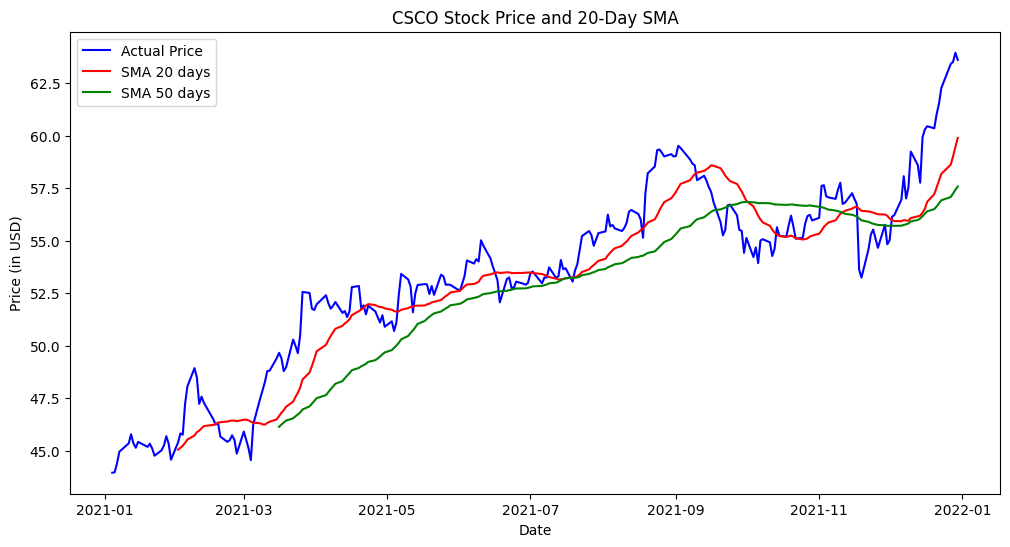

In [ ]:
## Plot Stock Price and SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual Price', color='blue')
plt.plot(stock_data['SMA_20'], label=f'SMA {window_size} days', color='red')
plt.plot(stock_data['SMA_50'], label=f'SMA {window_size_50} days', color='green')
plt.title(f'{symbol} Stock Price and {window_size}-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
The best window size is 38 with a total return of 1.3036163699982803


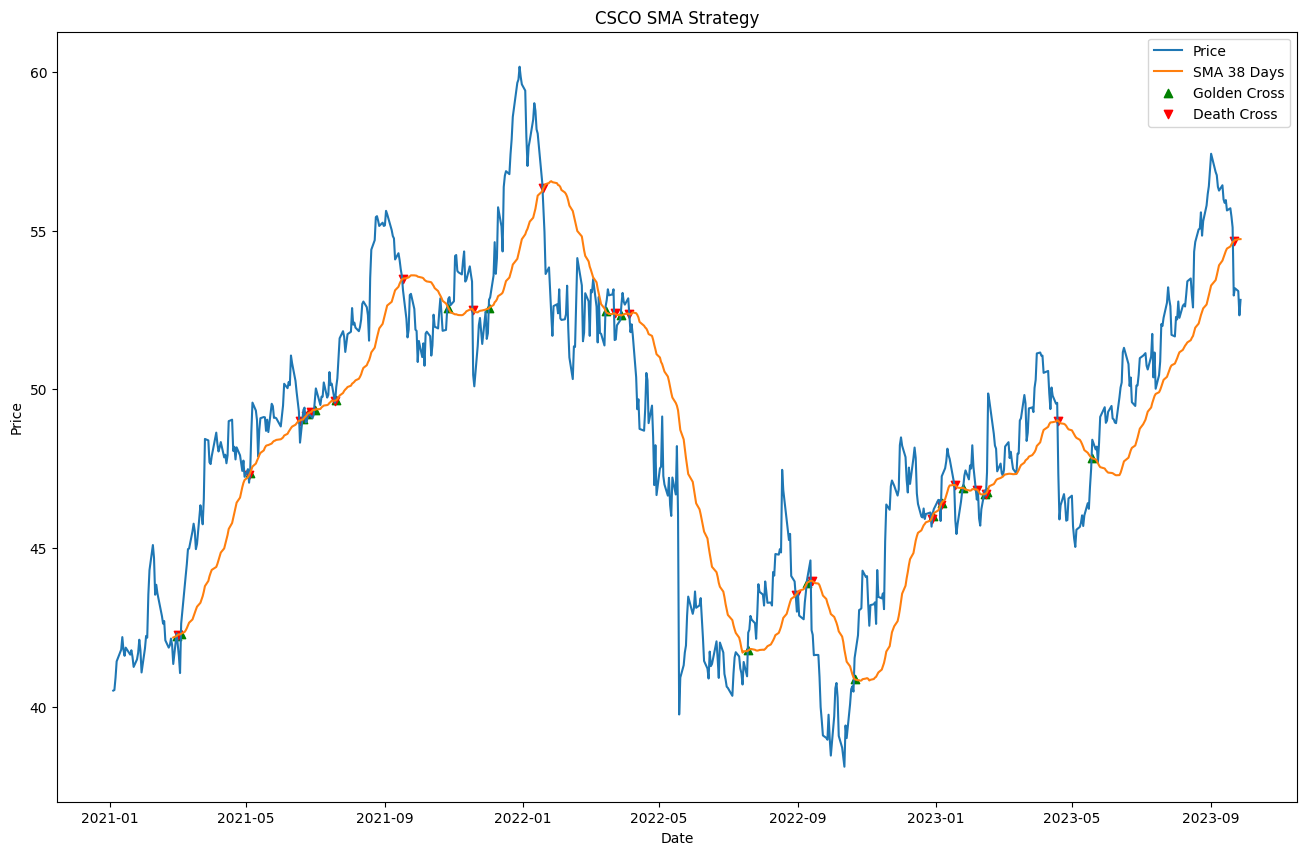

Initial Investment: 10000.00
Final Investment: 13030.00

ROI: 30.30%
Sharpe Ratio: 0.33
CAGR: 30.30%


In [ ]:
class SMAStrategy:
    def __init__(self, ticker, start_date, end_date, initial_investment=10000):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.initial_investment = initial_investment
        self.final_investment = None
        self.data = None
        self.best_window = None

    def fetch_data(self):
        raw = yf.download(self.ticker, start=self.start_date, end=self.end_date).dropna()
        self.data = pd.DataFrame(raw['Adj Close']).rename(columns={'Adj Close': 'Price'})

    def find_best_window(self):
        best_return = -np.inf  # Initialize with a very low value
        best_window = None

        for window in range(10, 61):  # Testing window sizes from 10 to 60
            self.data[f'SMA_{window}'] = self.data['Price'].rolling(window=window).mean()
            self.data['Signal'] = 0.0  # Initialize the signal column
            self.data['Signal'][window:] = np.where(self.data['Price'][window:] > self.data[f'SMA_{window}'][window:], 1.0, 0.0)
            self.data['Daily_Return'] = self.data['Price'].pct_change()
            self.data['Strategy_Return'] = self.data['Signal'].shift(1) * self.data['Daily_Return']

            total_return = (self.data['Strategy_Return'] + 1).prod()
            if total_return > best_return:
                best_return = total_return
                best_window = window

        self.best_window = best_window
        print(f"The best window size is {best_window} with a total return of {best_return}")

    def apply_strategy(self):
        self.data['Position'] = np.where(self.data['Price'] > self.data[f'SMA_{self.best_window}'], 1, -1)
        self.data['Market_Returns'] = np.log(self.data['Price'] / self.data['Price'].shift(1))
        self.data['Strategy_Returns'] = self.data['Position'].shift(1) * self.data['Market_Returns']

        self.cash_available = self.initial_investment
        self.shares_owned = 0

        for i in range(1, len(self.data)):
            position = self.data.iloc[i]['Position']
            current_price = self.data.iloc[i]['Price']

            if position == 1:  # Buy signal
                shares_to_buy = self.cash_available // current_price  # Max shares to buy
                cost = shares_to_buy * current_price
                self.cash_available -= cost
                self.shares_owned += shares_to_buy

            elif position == -1:  # Sell signal
                revenue = self.shares_owned * current_price
                self.cash_available += revenue
                self.shares_owned = 0

            self.final_investment = self.cash_available + self.shares_owned * current_price

        roi, sharpe_ratio, cagr = self.calculate_performance()

        # Plotting
        plt.figure(figsize=(16, 10))
        plt.plot(self.data['Price'], label='Price')
        plt.plot(self.data[f'SMA_{self.best_window}'], label=f'SMA {self.best_window} Days')

        # Adding symbols for golden and death crossovers
        # Create a column to hold day-to-day changes in Position
        self.data['Position_Change'] = self.data['Position'].diff()

        # Plotting the Golden Crosses with a green circle
        plt.scatter(self.data.index[self.data['Position_Change'] == 2],
                    self.data.loc[self.data['Position_Change'] == 2, f'SMA_{self.best_window}'],
                    marker='^', color='g', label='Golden Cross', alpha=1)

        # Plotting the Death Crosses with a red 'x'
        plt.scatter(self.data.index[self.data['Position_Change'] == -2],
                    self.data.loc[self.data['Position_Change'] == -2, f'SMA_{self.best_window}'],
                    marker='v', color='r', label='Death Cross', alpha=1)

        plt.title(f"{self.ticker} SMA Strategy")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        print(f"Initial Investment: {self.initial_investment:.2f}")
        print(f"Final Investment: {self.final_investment:.2f}")
        print()
        print(f"ROI: {roi:.2f}%")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"CAGR: {cagr:.2f}%")

    def calculate_performance(self):
        roi = (self.final_investment - self.initial_investment) / self.initial_investment * 100
        yearly_return = self.data['Strategy_Returns'].mean() * 252
        risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
        risk = self.data['Strategy_Returns'].std() * 252 ** 0.5
        sharpe_ratio = (yearly_return - risk_free_rate) / risk
        cagr = ((self.final_investment / self.initial_investment) ** (1 / (2023 - 2022)) - 1) * 100
        return roi, sharpe_ratio, cagr

if __name__ == '__main__':
    sma_strategy = SMAStrategy('CSCO', '2021-01-01', '2023-09-28')
    sma_strategy.fetch_data()
    sma_strategy.find_best_window()
    sma_strategy.apply_strategy()

## **Performance CISCO**

[*********************100%%**********************]  1 of 1 completed


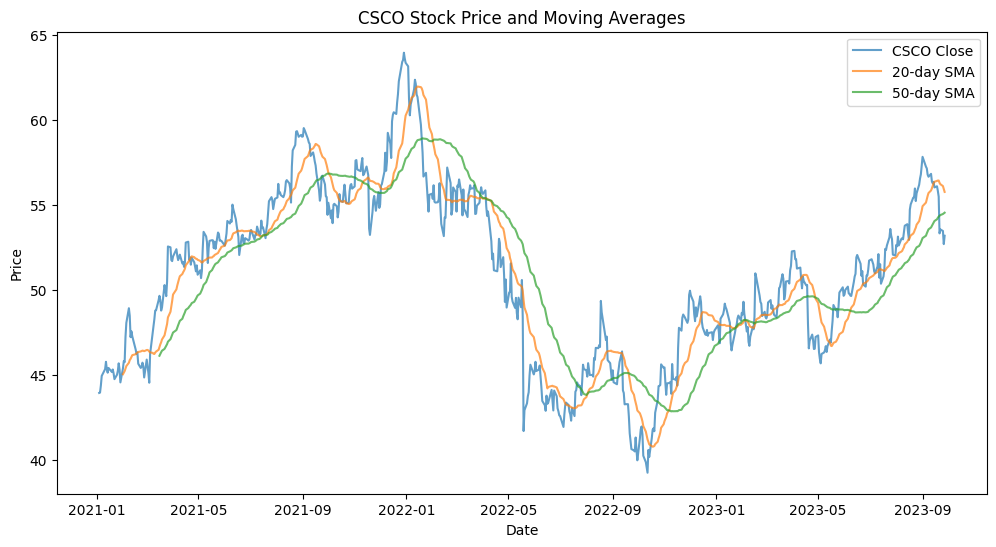

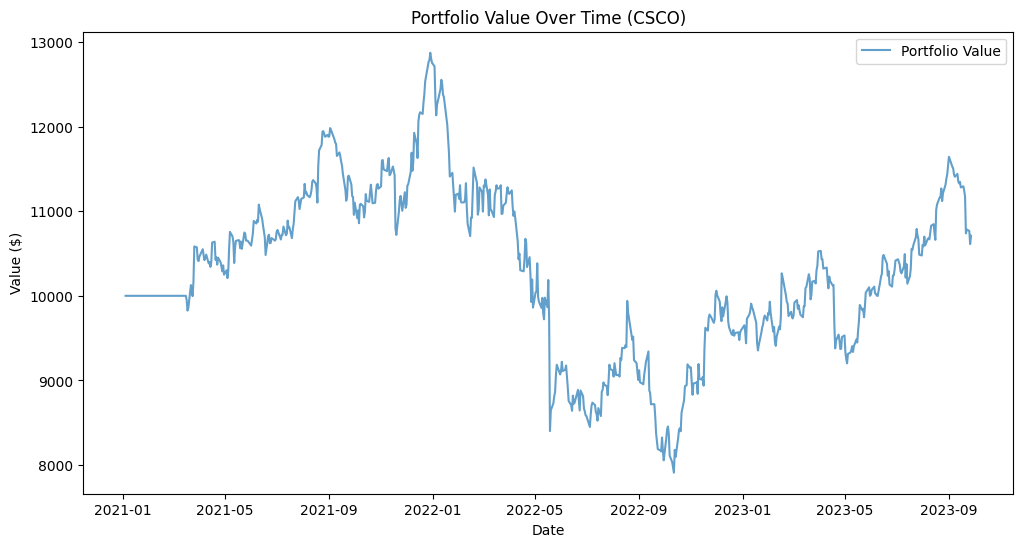

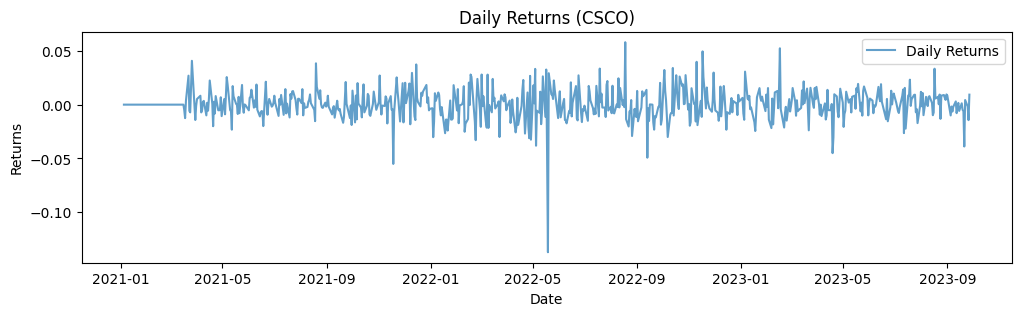

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol
stock_symbol = 'CSCO'

# Download data using yfinance
start_date = '2021-01-01'
end_date = '2023-09-28'

# Download the data for the stock_symbol
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 20-day and 50-day moving averages
short_window = 20
long_window = 50

stock_data['SMA20'] = stock_data['Close'].rolling(window=short_window).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=long_window).mean()

# Create a DataFrame to store the trading signals
signals = pd.DataFrame(index=stock_data.index)
signals['Signal'] = 0.0  # Initialize all signals to 0

# Create a signal when the short-term SMA crosses above the long-term SMA
signals['Signal'][short_window:] = np.where(
    stock_data['SMA20'][short_window:] > stock_data['SMA50'][short_window:], 1.0, 0.0
)

# Initialize capital and position
initial_capital = 10000.0  # Updated initial capital to $10,000
position = 0
cash = initial_capital

# Implement the trading strategy
portfolio_value = []
for i in range(len(signals)):
    if signals['Signal'][i] == 1.0:  # Buy signal
        if cash > 0:
            shares_to_buy = cash // stock_data['Close'].iloc[i]
            position += shares_to_buy
            cash -= shares_to_buy * stock_data['Close'].iloc[i]
    elif signals['Signal'][i] == -1.0:  # Sell signal
        if position > 0:
            cash += position * stock_data['Close'].iloc[i]
            position = 0

    # Calculate portfolio value at each step
    portfolio_value.append(cash + position * stock_data['Close'].iloc[i])

# Calculate daily returns
returns = pd.Series(portfolio_value).pct_change()

# Plot portfolio value and daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Close', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day SMA', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day SMA', alpha=0.7)
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_value, label='Portfolio Value', alpha=0.7)
plt.title(f'Portfolio Value Over Time ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()

plt.figure(figsize=(12, 3))
plt.plot(signals.index, returns, label='Daily Returns', alpha=0.7)
plt.title(f'Daily Returns ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()


In [ ]:
# Calculate the final portfolio value
CSCO_value = portfolio_value[-1]

# Print the final portfolio value
print(f"Final Portfolio Value: ${CSCO_value:.2f}")


Final Portfolio Value: $10709.53


# **Stock 7 INVESCO LTD**

## **SMA for INVESCO LTD**

In [ ]:
## Load Stock Data
symbol = 'IVZ'
stock_data = yf.download(symbol, start='2021-01-01', end='2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
## Calculate Simple Moving Average
def simple_moving_average(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

In [ ]:
window_size = 20  # Using a 20-day SMA
stock_data['SMA_20'] = simple_moving_average(stock_data, window_size)

window_size_50 = 50  # Using a 50-day SMA
stock_data['SMA_50'] = simple_moving_average(stock_data, window_size_50)


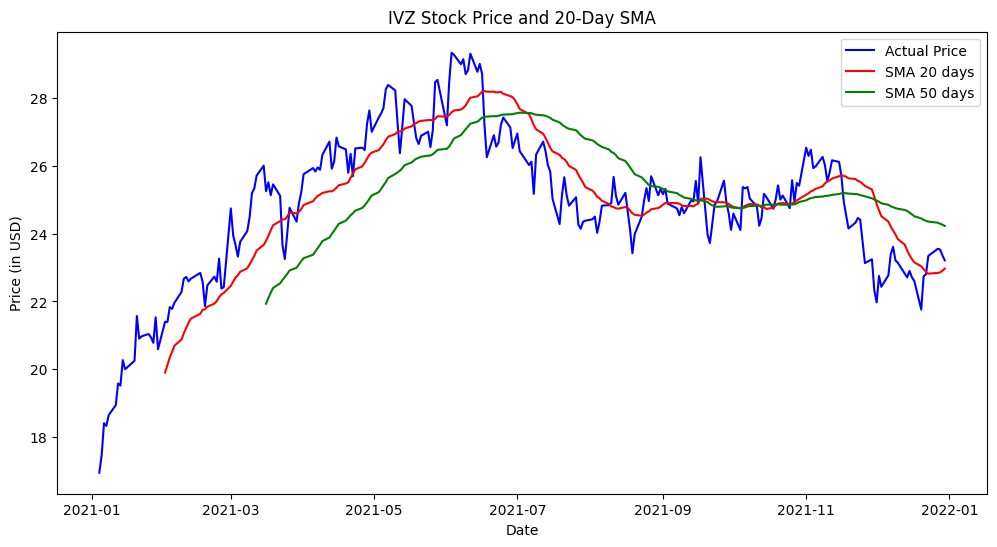

In [ ]:
## Plot Stock Price and SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual Price', color='blue')
plt.plot(stock_data['SMA_20'], label=f'SMA {window_size} days', color='red')
plt.plot(stock_data['SMA_50'], label=f'SMA {window_size_50} days', color='green')
plt.title(f'{symbol} Stock Price and {window_size}-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
The best window size is 18 with a total return of 0.9598787084170545


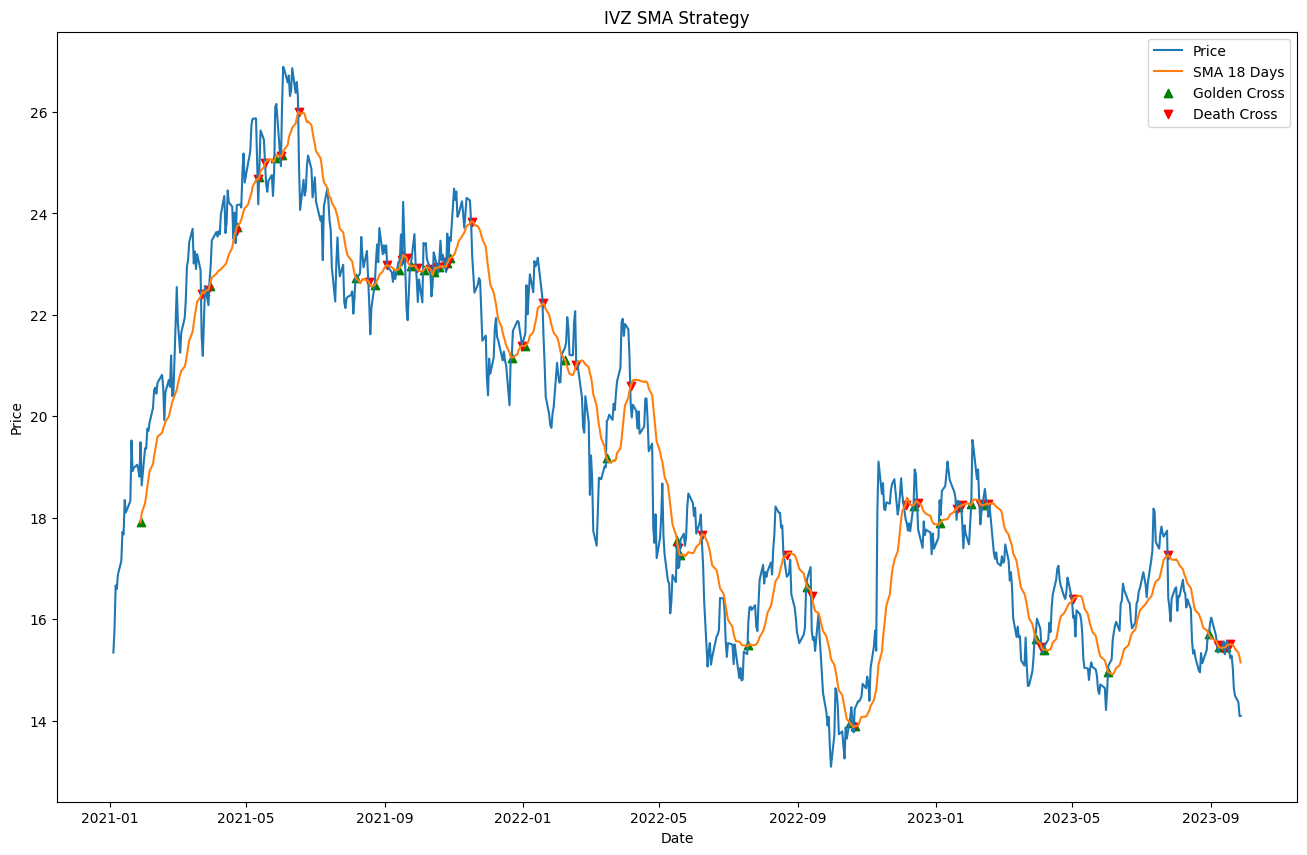

Initial Investment: 10000.00
Final Investment: 9179.93

ROI: -8.20%
Sharpe Ratio: -0.14
CAGR: -8.20%


In [ ]:
class SMAStrategy:
    def __init__(self, ticker, start_date, end_date, initial_investment=10000):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.initial_investment = initial_investment
        self.final_investment = None
        self.data = None
        self.best_window = None

    def fetch_data(self):
        raw = yf.download(self.ticker, start=self.start_date, end=self.end_date).dropna()
        self.data = pd.DataFrame(raw['Adj Close']).rename(columns={'Adj Close': 'Price'})

    def find_best_window(self):
        best_return = -np.inf  # Initialize with a very low value
        best_window = None

        for window in range(10, 61):  # Testing window sizes from 10 to 60
            self.data[f'SMA_{window}'] = self.data['Price'].rolling(window=window).mean()
            self.data['Signal'] = 0.0  # Initialize the signal column
            self.data['Signal'][window:] = np.where(self.data['Price'][window:] > self.data[f'SMA_{window}'][window:], 1.0, 0.0)
            self.data['Daily_Return'] = self.data['Price'].pct_change()
            self.data['Strategy_Return'] = self.data['Signal'].shift(1) * self.data['Daily_Return']

            total_return = (self.data['Strategy_Return'] + 1).prod()
            if total_return > best_return:
                best_return = total_return
                best_window = window

        self.best_window = best_window
        print(f"The best window size is {best_window} with a total return of {best_return}")

    def apply_strategy(self):
        self.data['Position'] = np.where(self.data['Price'] > self.data[f'SMA_{self.best_window}'], 1, -1)
        self.data['Market_Returns'] = np.log(self.data['Price'] / self.data['Price'].shift(1))
        self.data['Strategy_Returns'] = self.data['Position'].shift(1) * self.data['Market_Returns']

        self.cash_available = self.initial_investment
        self.shares_owned = 0

        for i in range(1, len(self.data)):
            position = self.data.iloc[i]['Position']
            current_price = self.data.iloc[i]['Price']

            if position == 1:  # Buy signal
                shares_to_buy = self.cash_available // current_price  # Max shares to buy
                cost = shares_to_buy * current_price
                self.cash_available -= cost
                self.shares_owned += shares_to_buy

            elif position == -1:  # Sell signal
                revenue = self.shares_owned * current_price
                self.cash_available += revenue
                self.shares_owned = 0

            self.final_investment = self.cash_available + self.shares_owned * current_price

        roi, sharpe_ratio, cagr = self.calculate_performance()

        # Plotting
        plt.figure(figsize=(16, 10))
        plt.plot(self.data['Price'], label='Price')
        plt.plot(self.data[f'SMA_{self.best_window}'], label=f'SMA {self.best_window} Days')

        # Adding symbols for golden and death crossovers
        # Create a column to hold day-to-day changes in Position
        self.data['Position_Change'] = self.data['Position'].diff()

        # Plotting the Golden Crosses with a green circle
        plt.scatter(self.data.index[self.data['Position_Change'] == 2],
                    self.data.loc[self.data['Position_Change'] == 2, f'SMA_{self.best_window}'],
                    marker='^', color='g', label='Golden Cross', alpha=1)

        # Plotting the Death Crosses with a red 'x'
        plt.scatter(self.data.index[self.data['Position_Change'] == -2],
                    self.data.loc[self.data['Position_Change'] == -2, f'SMA_{self.best_window}'],
                    marker='v', color='r', label='Death Cross', alpha=1)

        plt.title(f"{self.ticker} SMA Strategy")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        print(f"Initial Investment: {self.initial_investment:.2f}")
        print(f"Final Investment: {self.final_investment:.2f}")
        print()
        print(f"ROI: {roi:.2f}%")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"CAGR: {cagr:.2f}%")

    def calculate_performance(self):
        roi = (self.final_investment - self.initial_investment) / self.initial_investment * 100
        yearly_return = self.data['Strategy_Returns'].mean() * 252
        risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
        risk = self.data['Strategy_Returns'].std() * 252 ** 0.5
        sharpe_ratio = (yearly_return - risk_free_rate) / risk
        cagr = ((self.final_investment / self.initial_investment) ** (1 / (2023 - 2022)) - 1) * 100
        return roi, sharpe_ratio, cagr

if __name__ == '__main__':
    sma_strategy = SMAStrategy('IVZ', '2021-01-01', '2023-09-28')
    sma_strategy.fetch_data()
    sma_strategy.find_best_window()
    sma_strategy.apply_strategy()

## **Performance for INVESCO LTD**

[*********************100%%**********************]  1 of 1 completed


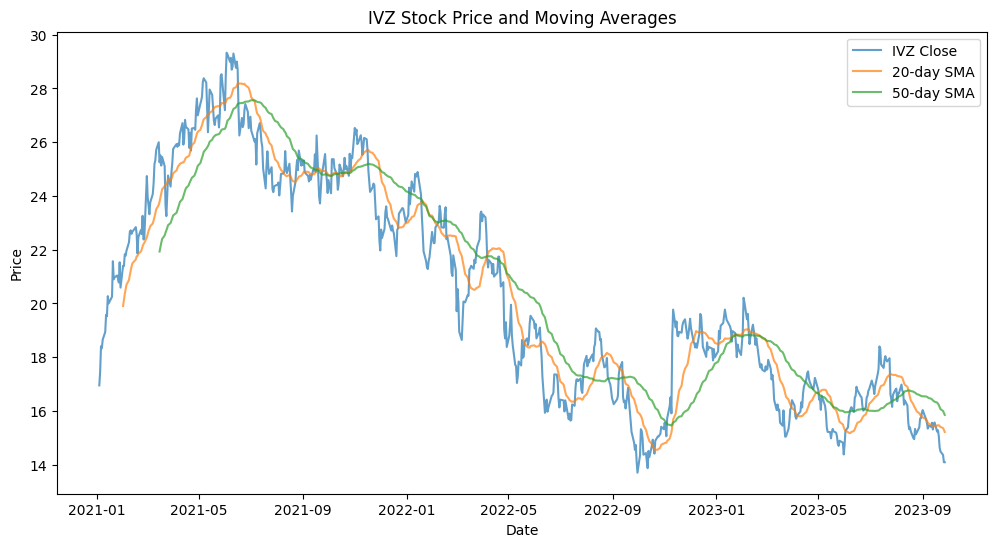

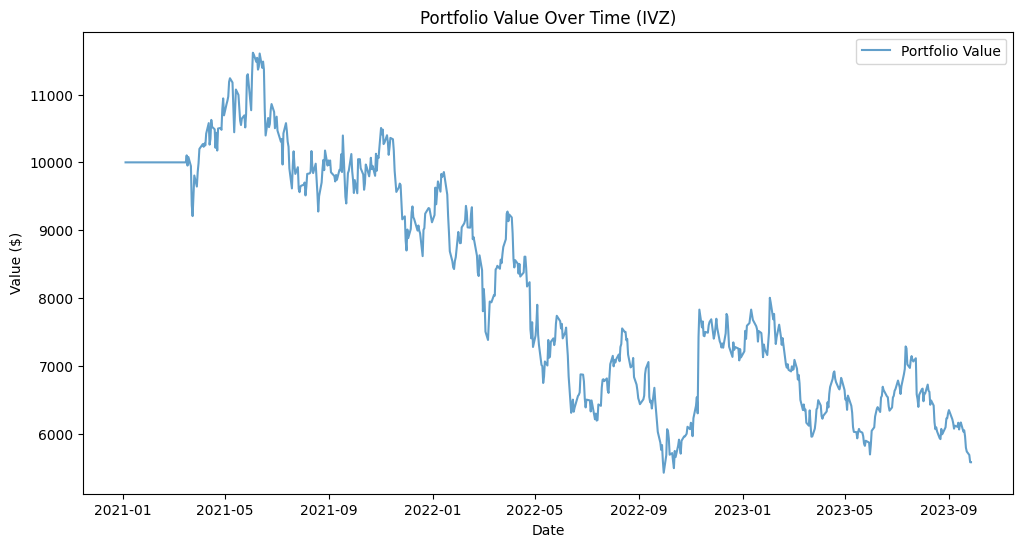

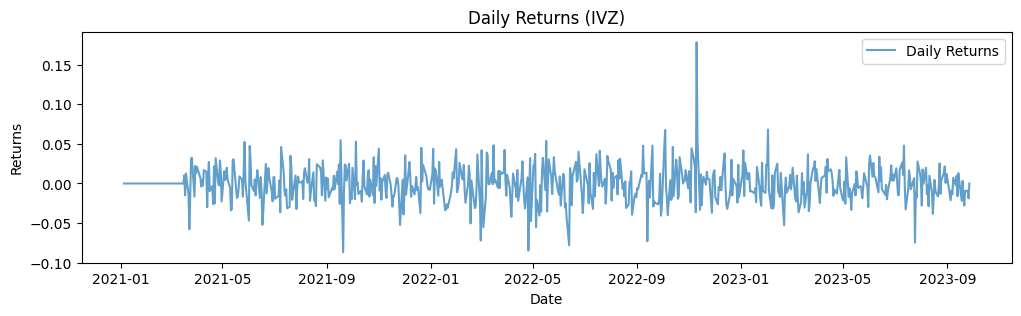

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol
stock_symbol = 'IVZ'

# Download data using yfinance
start_date = '2021-01-01'
end_date = '2023-09-28'

# Download the data for the stock_symbol
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 20-day and 50-day moving averages
short_window = 20
long_window = 50

stock_data['SMA20'] = stock_data['Close'].rolling(window=short_window).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=long_window).mean()

# Create a DataFrame to store the trading signals
signals = pd.DataFrame(index=stock_data.index)
signals['Signal'] = 0.0  # Initialize all signals to 0

# Create a signal when the short-term SMA crosses above the long-term SMA
signals['Signal'][short_window:] = np.where(
    stock_data['SMA20'][short_window:] > stock_data['SMA50'][short_window:], 1.0, 0.0
)

# Initialize capital and position
initial_capital = 10000.0  # Updated initial capital to $10,000
position = 0
cash = initial_capital

# Implement the trading strategy
portfolio_value = []
for i in range(len(signals)):
    if signals['Signal'][i] == 1.0:  # Buy signal
        if cash > 0:
            shares_to_buy = cash // stock_data['Close'].iloc[i]
            position += shares_to_buy
            cash -= shares_to_buy * stock_data['Close'].iloc[i]
    elif signals['Signal'][i] == -1.0:  # Sell signal
        if position > 0:
            cash += position * stock_data['Close'].iloc[i]
            position = 0

    # Calculate portfolio value at each step
    portfolio_value.append(cash + position * stock_data['Close'].iloc[i])

# Calculate daily returns
returns = pd.Series(portfolio_value).pct_change()

# Plot portfolio value and daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Close', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day SMA', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day SMA', alpha=0.7)
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_value, label='Portfolio Value', alpha=0.7)
plt.title(f'Portfolio Value Over Time ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()

plt.figure(figsize=(12, 3))
plt.plot(signals.index, returns, label='Daily Returns', alpha=0.7)
plt.title(f'Daily Returns ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()


In [ ]:
# Calculate the final portfolio value
IVZ_value = portfolio_value[-1]

# Print the final portfolio value
print(f"Final Portfolio Value: ${IVZ_value:.2f}")


Final Portfolio Value: $5580.64


# **Stock 8 CEASARS ENTERTAINMENT**

## **SMA for CEASARS ENTERTAINMENT**

In [ ]:
## Load Stock Data
symbol = 'CZR'
stock_data = yf.download(symbol, start='2021-01-01', end='2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
## Calculate Simple Moving Average
def simple_moving_average(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

In [ ]:
window_size = 20  # Using a 20-day SMA
stock_data['SMA_20'] = simple_moving_average(stock_data, window_size)

window_size_50 = 50  # Using a 50-day SMA
stock_data['SMA_50'] = simple_moving_average(stock_data, window_size_50)


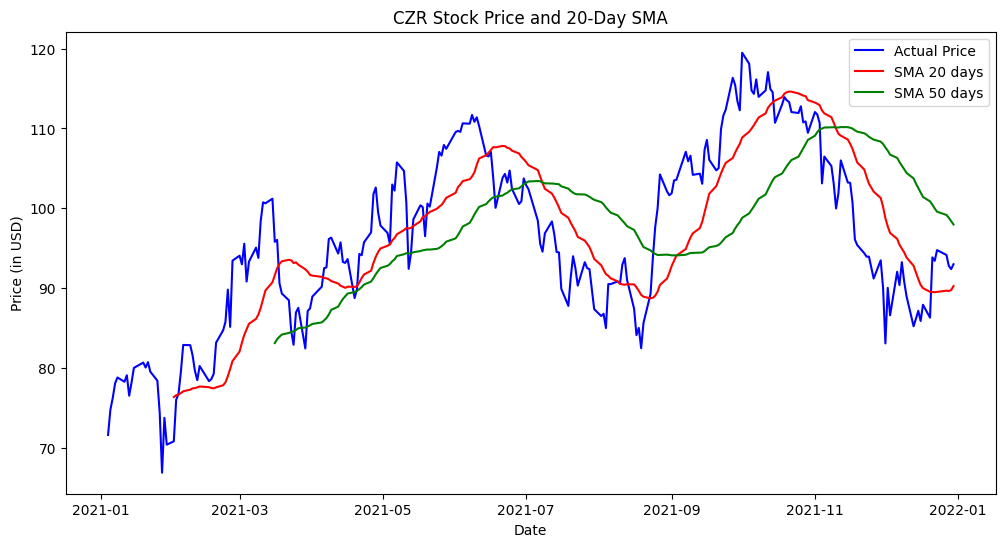

In [ ]:
## Plot Stock Price and SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual Price', color='blue')
plt.plot(stock_data['SMA_20'], label=f'SMA {window_size} days', color='red')
plt.plot(stock_data['SMA_50'], label=f'SMA {window_size_50} days', color='green')
plt.title(f'{symbol} Stock Price and {window_size}-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
The best window size is 20 with a total return of 1.0224324365694795


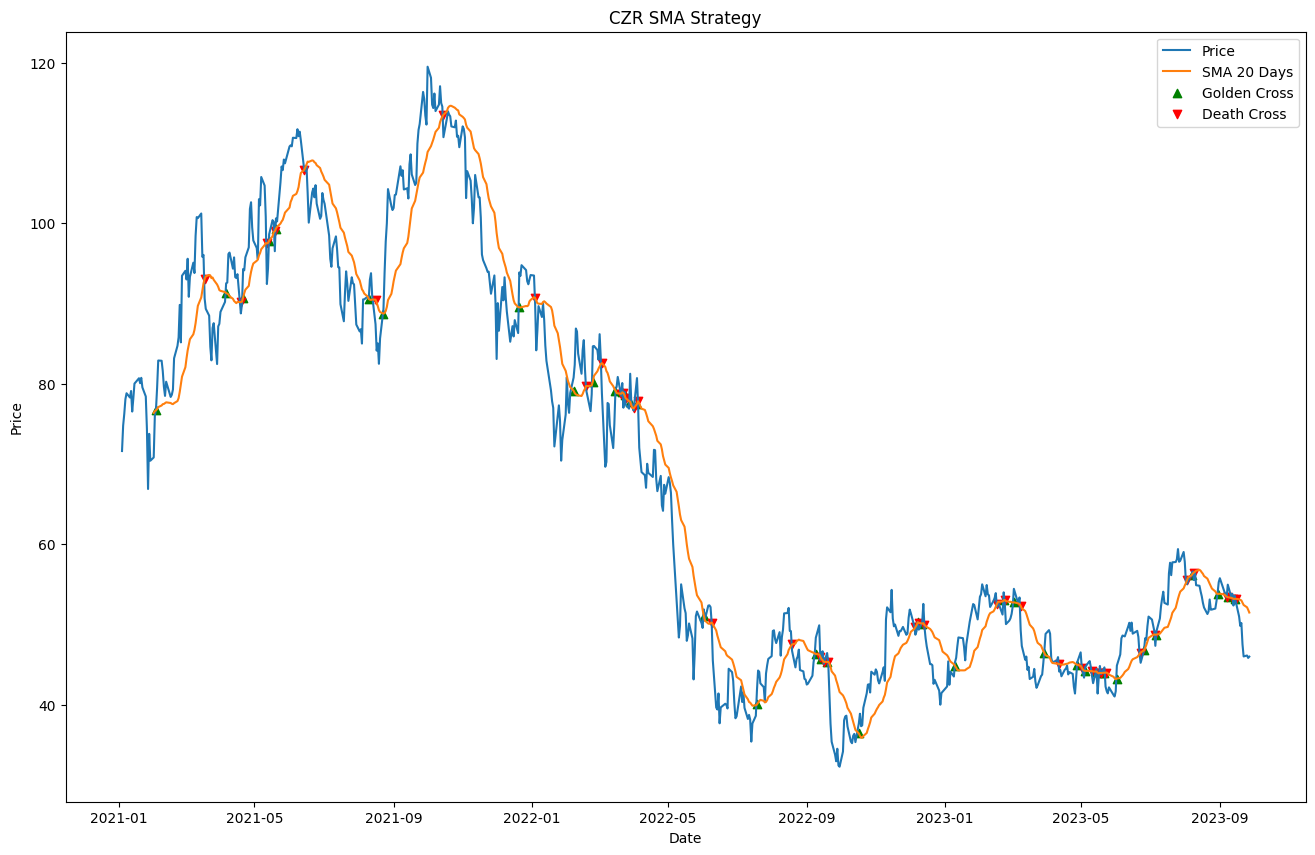

Initial Investment: 10000.00
Final Investment: 10229.91

ROI: 2.30%
Sharpe Ratio: 0.28
CAGR: 2.30%


In [ ]:
class SMAStrategy:
    def __init__(self, ticker, start_date, end_date, initial_investment=10000):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.initial_investment = initial_investment
        self.final_investment = None
        self.data = None
        self.best_window = None

    def fetch_data(self):
        raw = yf.download(self.ticker, start=self.start_date, end=self.end_date).dropna()
        self.data = pd.DataFrame(raw['Adj Close']).rename(columns={'Adj Close': 'Price'})

    def find_best_window(self):
        best_return = -np.inf  # Initialize with a very low value
        best_window = None

        for window in range(10, 61):  # Testing window sizes from 10 to 60
            self.data[f'SMA_{window}'] = self.data['Price'].rolling(window=window).mean()
            self.data['Signal'] = 0.0  # Initialize the signal column
            self.data['Signal'][window:] = np.where(self.data['Price'][window:] > self.data[f'SMA_{window}'][window:], 1.0, 0.0)
            self.data['Daily_Return'] = self.data['Price'].pct_change()
            self.data['Strategy_Return'] = self.data['Signal'].shift(1) * self.data['Daily_Return']

            total_return = (self.data['Strategy_Return'] + 1).prod()
            if total_return > best_return:
                best_return = total_return
                best_window = window

        self.best_window = best_window
        print(f"The best window size is {best_window} with a total return of {best_return}")

    def apply_strategy(self):
        self.data['Position'] = np.where(self.data['Price'] > self.data[f'SMA_{self.best_window}'], 1, -1)
        self.data['Market_Returns'] = np.log(self.data['Price'] / self.data['Price'].shift(1))
        self.data['Strategy_Returns'] = self.data['Position'].shift(1) * self.data['Market_Returns']

        self.cash_available = self.initial_investment
        self.shares_owned = 0

        for i in range(1, len(self.data)):
            position = self.data.iloc[i]['Position']
            current_price = self.data.iloc[i]['Price']

            if position == 1:  # Buy signal
                shares_to_buy = self.cash_available // current_price  # Max shares to buy
                cost = shares_to_buy * current_price
                self.cash_available -= cost
                self.shares_owned += shares_to_buy

            elif position == -1:  # Sell signal
                revenue = self.shares_owned * current_price
                self.cash_available += revenue
                self.shares_owned = 0

            self.final_investment = self.cash_available + self.shares_owned * current_price

        roi, sharpe_ratio, cagr = self.calculate_performance()

        # Plotting
        plt.figure(figsize=(16, 10))
        plt.plot(self.data['Price'], label='Price')
        plt.plot(self.data[f'SMA_{self.best_window}'], label=f'SMA {self.best_window} Days')

        # Adding symbols for golden and death crossovers
        # Create a column to hold day-to-day changes in Position
        self.data['Position_Change'] = self.data['Position'].diff()

        # Plotting the Golden Crosses with a green circle
        plt.scatter(self.data.index[self.data['Position_Change'] == 2],
                    self.data.loc[self.data['Position_Change'] == 2, f'SMA_{self.best_window}'],
                    marker='^', color='g', label='Golden Cross', alpha=1)

        # Plotting the Death Crosses with a red 'x'
        plt.scatter(self.data.index[self.data['Position_Change'] == -2],
                    self.data.loc[self.data['Position_Change'] == -2, f'SMA_{self.best_window}'],
                    marker='v', color='r', label='Death Cross', alpha=1)

        plt.title(f"{self.ticker} SMA Strategy")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        print(f"Initial Investment: {self.initial_investment:.2f}")
        print(f"Final Investment: {self.final_investment:.2f}")
        print()
        print(f"ROI: {roi:.2f}%")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"CAGR: {cagr:.2f}%")

    def calculate_performance(self):
        roi = (self.final_investment - self.initial_investment) / self.initial_investment * 100
        yearly_return = self.data['Strategy_Returns'].mean() * 252
        risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
        risk = self.data['Strategy_Returns'].std() * 252 ** 0.5
        sharpe_ratio = (yearly_return - risk_free_rate) / risk
        cagr = ((self.final_investment / self.initial_investment) ** (1 / (2023 - 2022)) - 1) * 100
        return roi, sharpe_ratio, cagr

if __name__ == '__main__':
    sma_strategy = SMAStrategy('CZR', '2021-01-01', '2023-09-28')
    sma_strategy.fetch_data()
    sma_strategy.find_best_window()
    sma_strategy.apply_strategy()

## **Performance for CEASARS ENTERTAINMENT**

[*********************100%%**********************]  1 of 1 completed


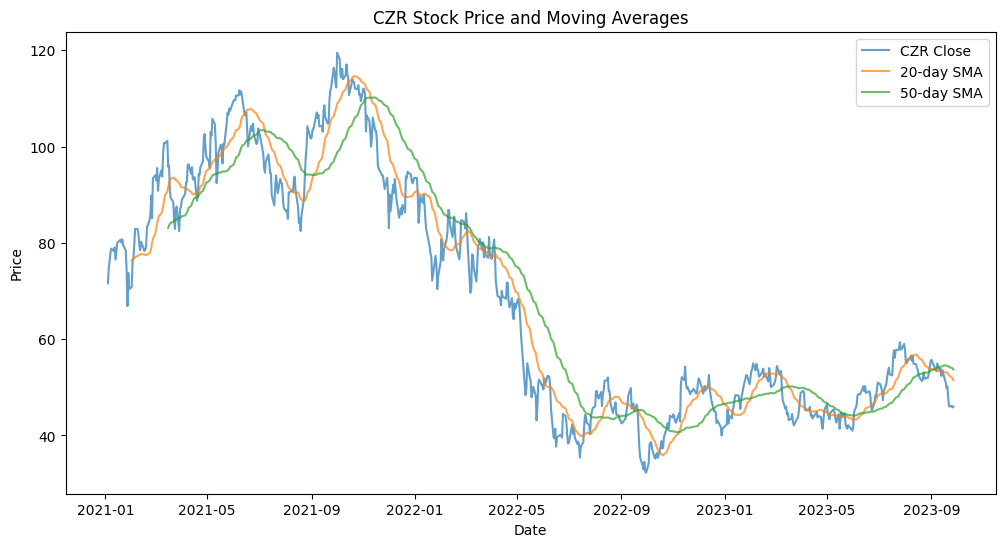

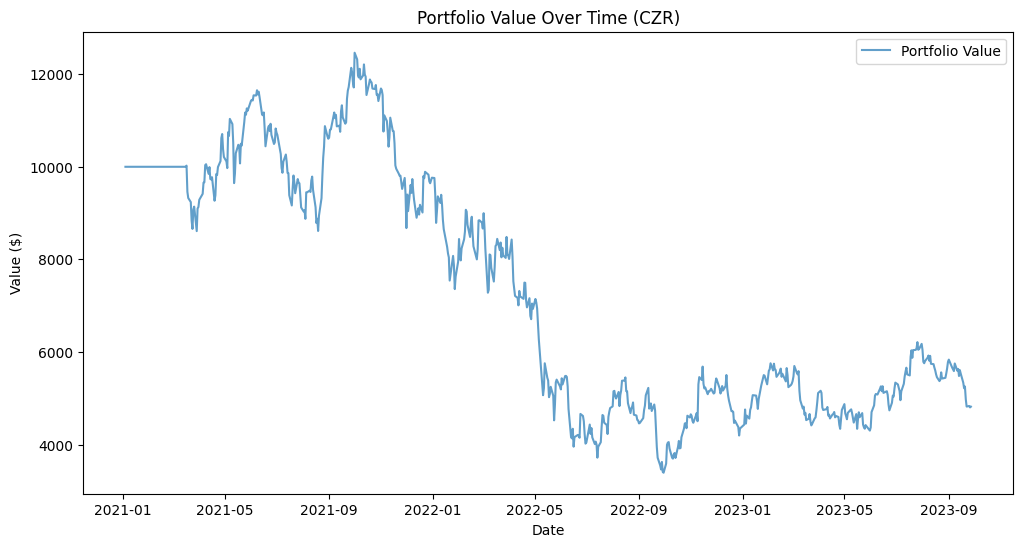

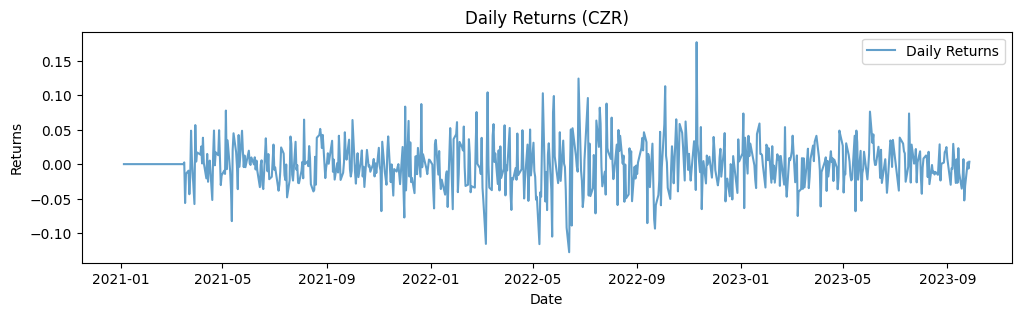

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol
stock_symbol = 'CZR'

# Download data using yfinance
start_date = '2021-01-01'
end_date = '2023-09-28'

# Download the data for the stock_symbol
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 20-day and 50-day moving averages
short_window = 20
long_window = 50

stock_data['SMA20'] = stock_data['Close'].rolling(window=short_window).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=long_window).mean()

# Create a DataFrame to store the trading signals
signals = pd.DataFrame(index=stock_data.index)
signals['Signal'] = 0.0  # Initialize all signals to 0

# Create a signal when the short-term SMA crosses above the long-term SMA
signals['Signal'][short_window:] = np.where(
    stock_data['SMA20'][short_window:] > stock_data['SMA50'][short_window:], 1.0, 0.0
)

# Initialize capital and position
initial_capital = 10000.0  # Updated initial capital to $10,000
position = 0
cash = initial_capital

# Implement the trading strategy
portfolio_value = []
for i in range(len(signals)):
    if signals['Signal'][i] == 1.0:  # Buy signal
        if cash > 0:
            shares_to_buy = cash // stock_data['Close'].iloc[i]
            position += shares_to_buy
            cash -= shares_to_buy * stock_data['Close'].iloc[i]
    elif signals['Signal'][i] == -1.0:  # Sell signal
        if position > 0:
            cash += position * stock_data['Close'].iloc[i]
            position = 0

    # Calculate portfolio value at each step
    portfolio_value.append(cash + position * stock_data['Close'].iloc[i])

# Calculate daily returns
returns = pd.Series(portfolio_value).pct_change()


# Plot portfolio value and daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Close', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day SMA', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day SMA', alpha=0.7)
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_value, label='Portfolio Value', alpha=0.7)
plt.title(f'Portfolio Value Over Time ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()

plt.figure(figsize=(12, 3))
plt.plot(signals.index, returns, label='Daily Returns', alpha=0.7)
plt.title(f'Daily Returns ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()


In [ ]:
# Calculate the final portfolio value
CZR_value = portfolio_value[-1]

# Print the final portfolio value
print(f"Final Portfolio Value: ${CZR_value:.2f}")


Final Portfolio Value: $4818.72


# **Stock 9 CARNIVAL**

## **SMA for CARNIVAL**

In [ ]:
## Load Stock Data
symbol = 'CCL'
stock_data = yf.download(symbol, start='2021-01-01', end='2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
## Calculate Simple Moving Average
def simple_moving_average(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

In [ ]:
window_size = 20  # Using a 20-day SMA
stock_data['SMA_20'] = simple_moving_average(stock_data, window_size)

window_size_50 = 50  # Using a 50-day SMA
stock_data['SMA_50'] = simple_moving_average(stock_data, window_size_50)


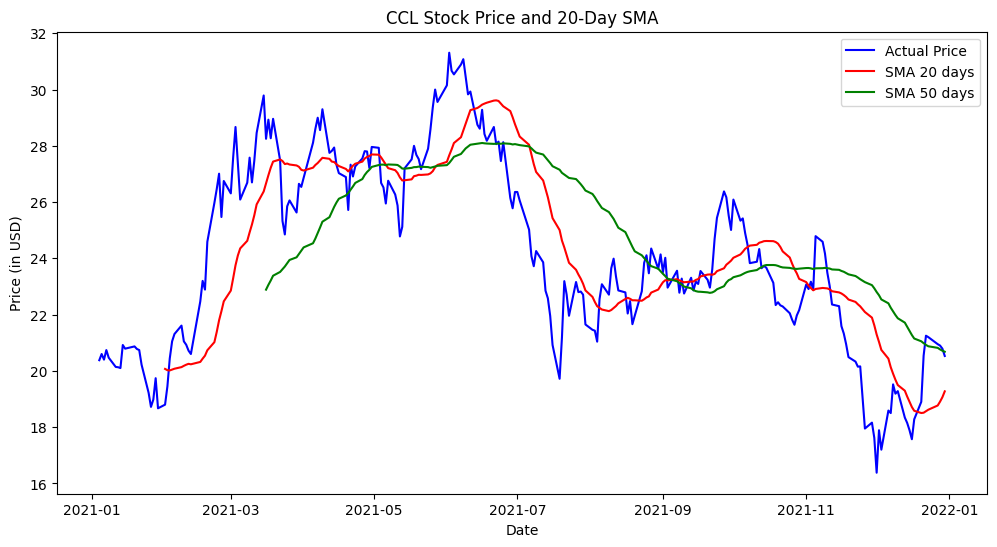

In [ ]:
## Plot Stock Price and SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual Price', color='blue')
plt.plot(stock_data['SMA_20'], label=f'SMA {window_size} days', color='red')
plt.plot(stock_data['SMA_50'], label=f'SMA {window_size_50} days', color='green')
plt.title(f'{symbol} Stock Price and {window_size}-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
The best window size is 20 with a total return of 1.9306876117624352


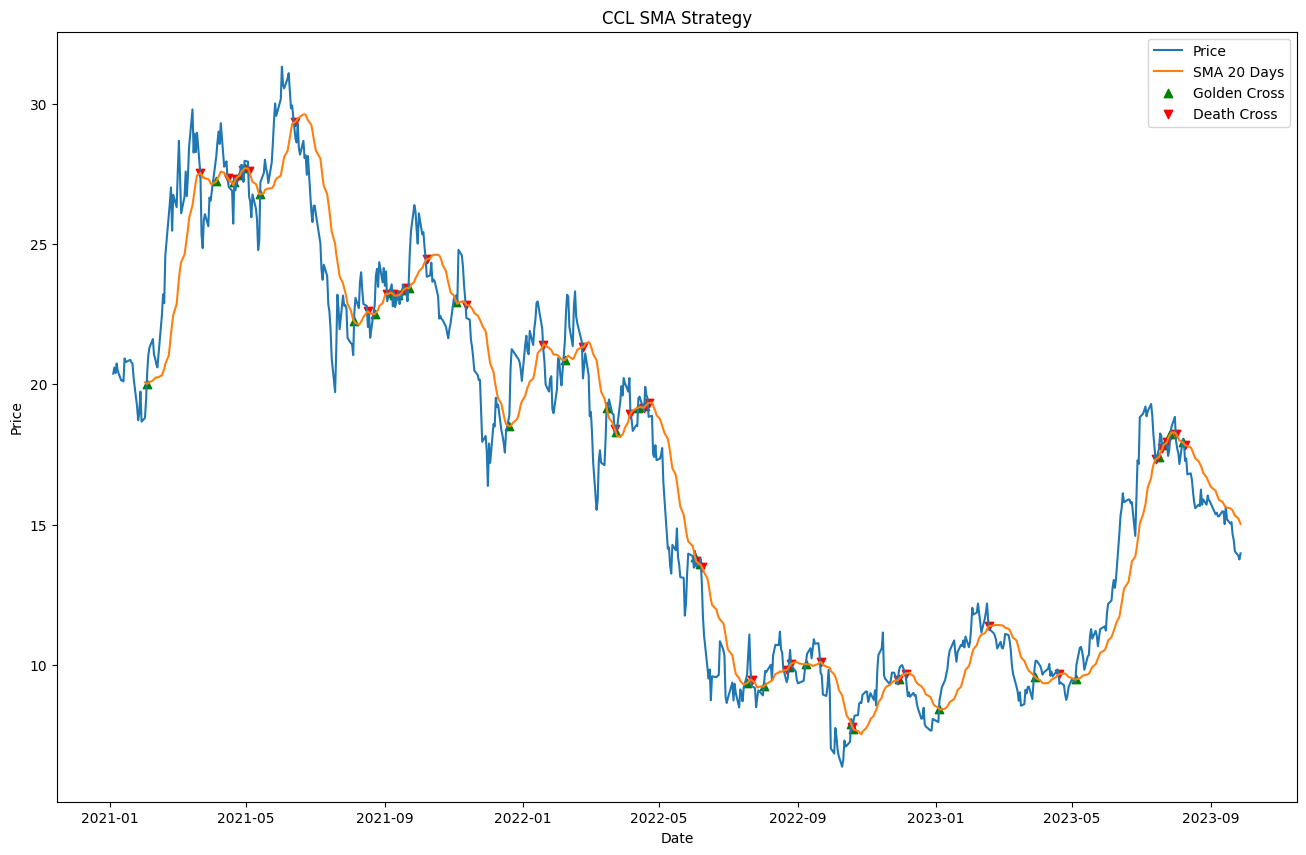

Initial Investment: 10000.00
Final Investment: 19302.20

ROI: 93.02%
Sharpe Ratio: 0.97
CAGR: 93.02%


In [ ]:
class SMAStrategy:
    def __init__(self, ticker, start_date, end_date, initial_investment=10000):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.initial_investment = initial_investment
        self.final_investment = None
        self.data = None
        self.best_window = None

    def fetch_data(self):
        raw = yf.download(self.ticker, start=self.start_date, end=self.end_date).dropna()
        self.data = pd.DataFrame(raw['Adj Close']).rename(columns={'Adj Close': 'Price'})

    def find_best_window(self):
        best_return = -np.inf  # Initialize with a very low value
        best_window = None

        for window in range(10, 61):  # Testing window sizes from 10 to 60
            self.data[f'SMA_{window}'] = self.data['Price'].rolling(window=window).mean()
            self.data['Signal'] = 0.0  # Initialize the signal column
            self.data['Signal'][window:] = np.where(self.data['Price'][window:] > self.data[f'SMA_{window}'][window:], 1.0, 0.0)
            self.data['Daily_Return'] = self.data['Price'].pct_change()
            self.data['Strategy_Return'] = self.data['Signal'].shift(1) * self.data['Daily_Return']

            total_return = (self.data['Strategy_Return'] + 1).prod()
            if total_return > best_return:
                best_return = total_return
                best_window = window

        self.best_window = best_window
        print(f"The best window size is {best_window} with a total return of {best_return}")

    def apply_strategy(self):
        self.data['Position'] = np.where(self.data['Price'] > self.data[f'SMA_{self.best_window}'], 1, -1)
        self.data['Market_Returns'] = np.log(self.data['Price'] / self.data['Price'].shift(1))
        self.data['Strategy_Returns'] = self.data['Position'].shift(1) * self.data['Market_Returns']

        self.cash_available = self.initial_investment
        self.shares_owned = 0

        for i in range(1, len(self.data)):
            position = self.data.iloc[i]['Position']
            current_price = self.data.iloc[i]['Price']

            if position == 1:  # Buy signal
                shares_to_buy = self.cash_available // current_price  # Max shares to buy
                cost = shares_to_buy * current_price
                self.cash_available -= cost
                self.shares_owned += shares_to_buy

            elif position == -1:  # Sell signal
                revenue = self.shares_owned * current_price
                self.cash_available += revenue
                self.shares_owned = 0

            self.final_investment = self.cash_available + self.shares_owned * current_price

        roi, sharpe_ratio, cagr = self.calculate_performance()

        # Plotting
        plt.figure(figsize=(16, 10))
        plt.plot(self.data['Price'], label='Price')
        plt.plot(self.data[f'SMA_{self.best_window}'], label=f'SMA {self.best_window} Days')

        # Adding symbols for golden and death crossovers
        # Create a column to hold day-to-day changes in Position
        self.data['Position_Change'] = self.data['Position'].diff()

        # Plotting the Golden Crosses with a green circle
        plt.scatter(self.data.index[self.data['Position_Change'] == 2],
                    self.data.loc[self.data['Position_Change'] == 2, f'SMA_{self.best_window}'],
                    marker='^', color='g', label='Golden Cross', alpha=1)

        # Plotting the Death Crosses with a red 'x'
        plt.scatter(self.data.index[self.data['Position_Change'] == -2],
                    self.data.loc[self.data['Position_Change'] == -2, f'SMA_{self.best_window}'],
                    marker='v', color='r', label='Death Cross', alpha=1)

        plt.title(f"{self.ticker} SMA Strategy")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        print(f"Initial Investment: {self.initial_investment:.2f}")
        print(f"Final Investment: {self.final_investment:.2f}")
        print()
        print(f"ROI: {roi:.2f}%")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"CAGR: {cagr:.2f}%")

    def calculate_performance(self):
        roi = (self.final_investment - self.initial_investment) / self.initial_investment * 100
        yearly_return = self.data['Strategy_Returns'].mean() * 252
        risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
        risk = self.data['Strategy_Returns'].std() * 252 ** 0.5
        sharpe_ratio = (yearly_return - risk_free_rate) / risk
        cagr = ((self.final_investment / self.initial_investment) ** (1 / (2023 - 2022)) - 1) * 100
        return roi, sharpe_ratio, cagr

if __name__ == '__main__':
    sma_strategy = SMAStrategy('CCL', '2021-01-01', '2023-09-28')
    sma_strategy.fetch_data()
    sma_strategy.find_best_window()
    sma_strategy.apply_strategy()

## **Performance for CARNIVAL**

[*********************100%%**********************]  1 of 1 completed


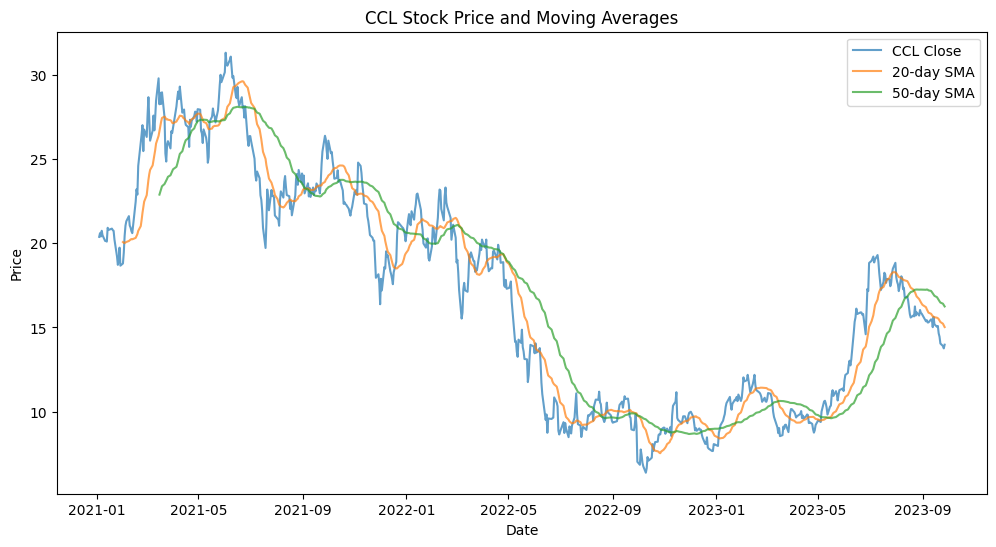

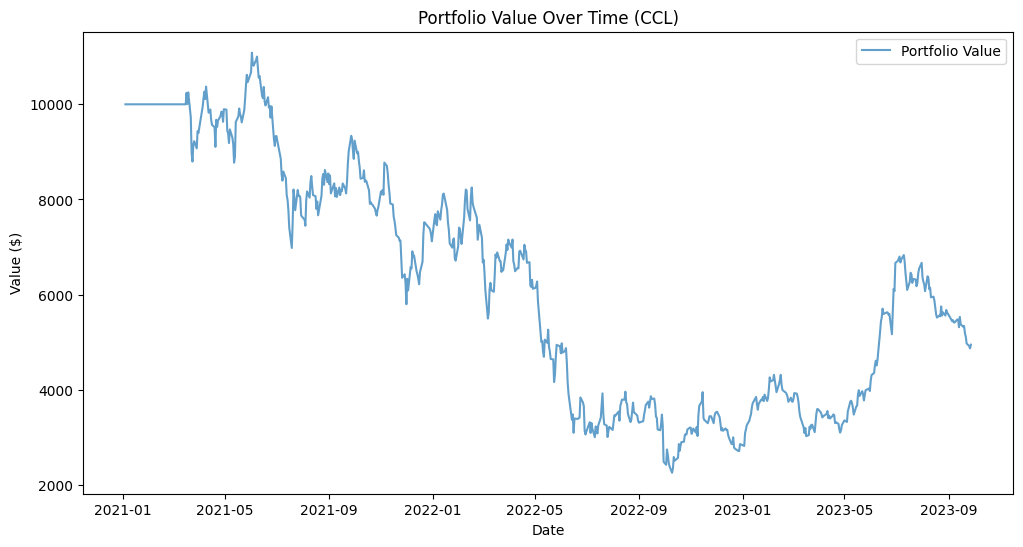

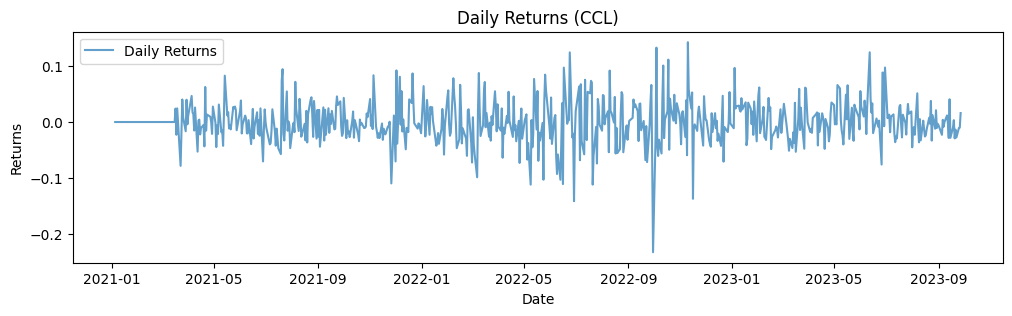

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol
stock_symbol = 'CCL'

# Download data using yfinance
start_date = '2021-01-01'
end_date = '2023-09-28'

# Download the data for the stock_symbol
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 20-day and 50-day moving averages
short_window = 20
long_window = 50

stock_data['SMA20'] = stock_data['Close'].rolling(window=short_window).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=long_window).mean()

# Create a DataFrame to store the trading signals
signals = pd.DataFrame(index=stock_data.index)
signals['Signal'] = 0.0  # Initialize all signals to 0

# Create a signal when the short-term SMA crosses above the long-term SMA
signals['Signal'][short_window:] = np.where(
    stock_data['SMA20'][short_window:] > stock_data['SMA50'][short_window:], 1.0, 0.0
)

# Initialize capital and position
initial_capital = 10000.0  # Updated initial capital to $10,000
position = 0
cash = initial_capital

# Implement the trading strategy
portfolio_value = []
for i in range(len(signals)):
    if signals['Signal'][i] == 1.0:  # Buy signal
        if cash > 0:
            shares_to_buy = cash // stock_data['Close'].iloc[i]
            position += shares_to_buy
            cash -= shares_to_buy * stock_data['Close'].iloc[i]
    elif signals['Signal'][i] == -1.0:  # Sell signal
        if position > 0:
            cash += position * stock_data['Close'].iloc[i]
            position = 0

    # Calculate portfolio value at each step
    portfolio_value.append(cash + position * stock_data['Close'].iloc[i])

# Calculate daily returns
returns = pd.Series(portfolio_value).pct_change()



# Plot portfolio value and daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Close', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day SMA', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day SMA', alpha=0.7)
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_value, label='Portfolio Value', alpha=0.7)
plt.title(f'Portfolio Value Over Time ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()

plt.figure(figsize=(12, 3))
plt.plot(signals.index, returns, label='Daily Returns', alpha=0.7)
plt.title(f'Daily Returns ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()


In [ ]:
# Calculate the final portfolio value
CCL_value = portfolio_value[-1]

# Print the final portfolio value
print(f"Final Portfolio Value: ${CCL_value:.2f}")


Final Portfolio Value: $4949.19


# **Stock 10 APPLE**

## **SMA for APPLE**

In [ ]:
## Load Stock Data
symbol = 'AAPL'
stock_data = yf.download(symbol, start='2021-01-01', end='2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
## Calculate Simple Moving Average
def simple_moving_average(data, window_size):
    return data['Close'].rolling(window=window_size).mean()

In [ ]:
window_size = 20  # Using a 20-day SMA
stock_data['SMA_20'] = simple_moving_average(stock_data, window_size)

window_size_50 = 50  # Using a 50-day SMA
stock_data['SMA_50'] = simple_moving_average(stock_data, window_size_50)



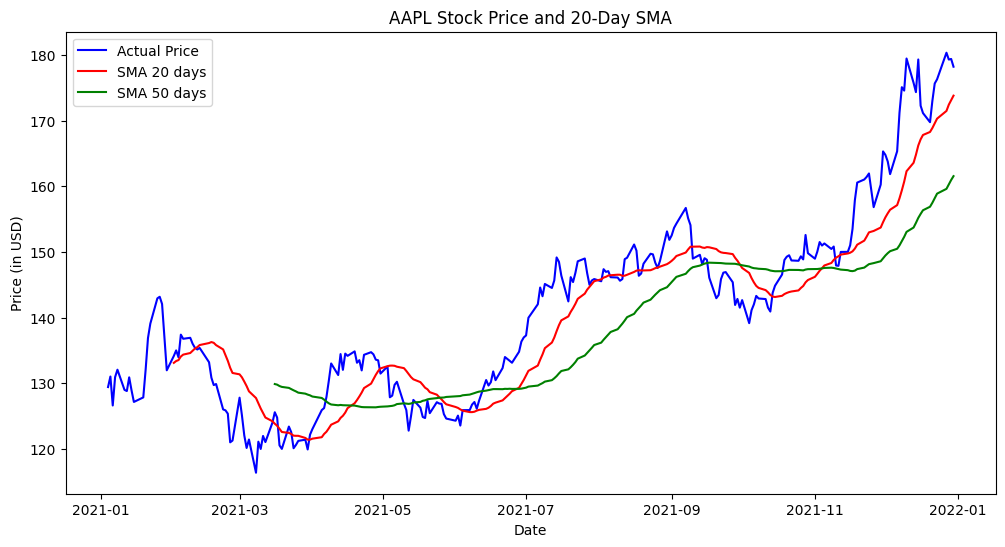

In [ ]:
## Plot Stock Price and SMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual Price', color='blue')
plt.plot(stock_data['SMA_20'], label=f'SMA {window_size} days', color='red')
plt.plot(stock_data['SMA_50'], label=f'SMA {window_size_50} days', color='green')
plt.title(f'{symbol} Stock Price and {window_size}-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
The best window size is 19 with a total return of 1.7813708035438356


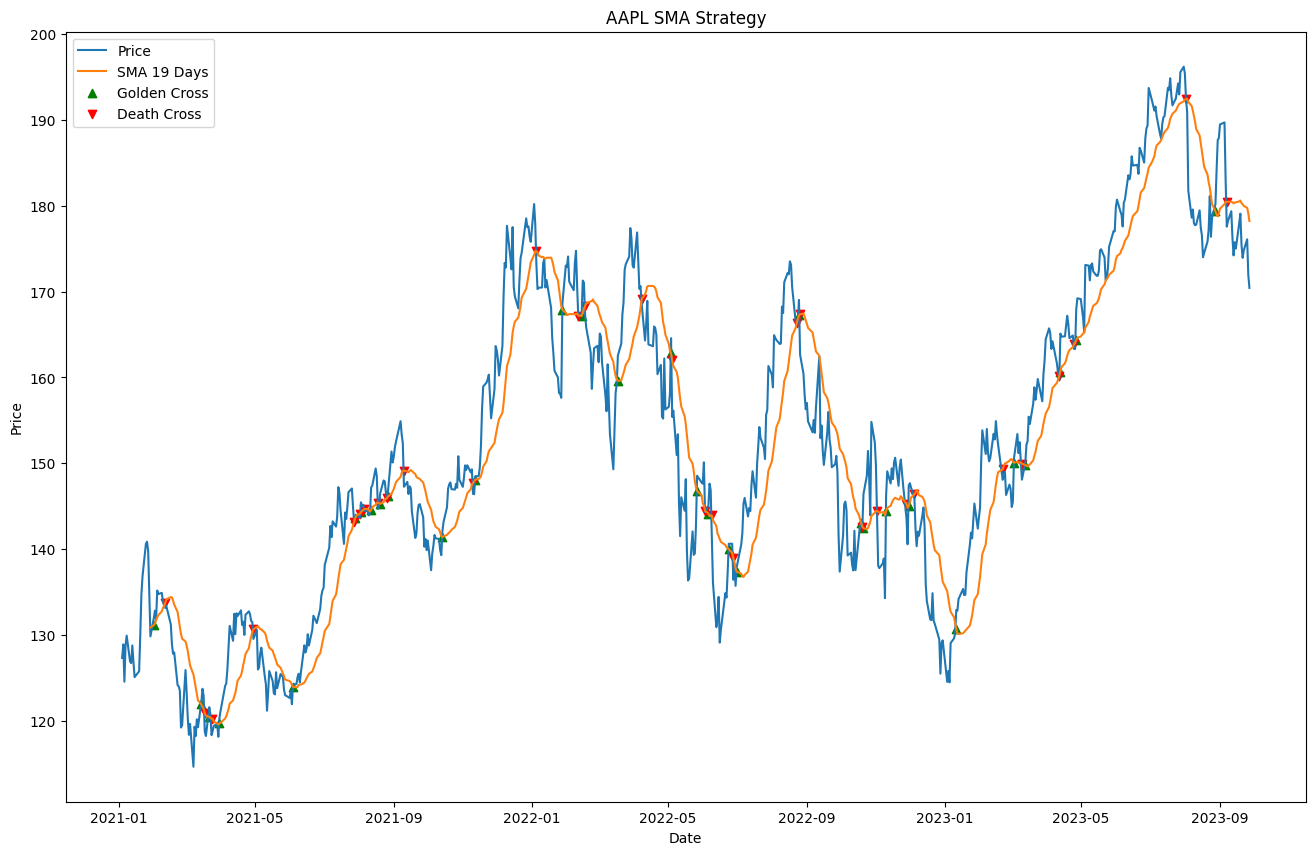

Initial Investment: 10000.00
Final Investment: 17739.55

ROI: 77.40%
Sharpe Ratio: 1.04
CAGR: 77.40%


In [ ]:
class SMAStrategy:
    def __init__(self, ticker, start_date, end_date, initial_investment=10000):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.initial_investment = initial_investment
        self.final_investment = None
        self.data = None
        self.best_window = None

    def fetch_data(self):
        raw = yf.download(self.ticker, start=self.start_date, end=self.end_date).dropna()
        self.data = pd.DataFrame(raw['Adj Close']).rename(columns={'Adj Close': 'Price'})

    def find_best_window(self):
        best_return = -np.inf  # Initialize with a very low value
        best_window = None

        for window in range(10, 61):  # Testing window sizes from 10 to 60
            self.data[f'SMA_{window}'] = self.data['Price'].rolling(window=window).mean()
            self.data['Signal'] = 0.0  # Initialize the signal column
            self.data['Signal'][window:] = np.where(self.data['Price'][window:] > self.data[f'SMA_{window}'][window:], 1.0, 0.0)
            self.data['Daily_Return'] = self.data['Price'].pct_change()
            self.data['Strategy_Return'] = self.data['Signal'].shift(1) * self.data['Daily_Return']

            total_return = (self.data['Strategy_Return'] + 1).prod()
            if total_return > best_return:
                best_return = total_return
                best_window = window

        self.best_window = best_window
        print(f"The best window size is {best_window} with a total return of {best_return}")

    def apply_strategy(self):
        self.data['Position'] = np.where(self.data['Price'] > self.data[f'SMA_{self.best_window}'], 1, -1)
        self.data['Market_Returns'] = np.log(self.data['Price'] / self.data['Price'].shift(1))
        self.data['Strategy_Returns'] = self.data['Position'].shift(1) * self.data['Market_Returns']

        self.cash_available = self.initial_investment
        self.shares_owned = 0

        for i in range(1, len(self.data)):
            position = self.data.iloc[i]['Position']
            current_price = self.data.iloc[i]['Price']

            if position == 1:  # Buy signal
                shares_to_buy = self.cash_available // current_price  # Max shares to buy
                cost = shares_to_buy * current_price
                self.cash_available -= cost
                self.shares_owned += shares_to_buy

            elif position == -1:  # Sell signal
                revenue = self.shares_owned * current_price
                self.cash_available += revenue
                self.shares_owned = 0

            self.final_investment = self.cash_available + self.shares_owned * current_price

        roi, sharpe_ratio, cagr = self.calculate_performance()

        # Plotting
        plt.figure(figsize=(16, 10))
        plt.plot(self.data['Price'], label='Price')
        plt.plot(self.data[f'SMA_{self.best_window}'], label=f'SMA {self.best_window} Days')

        # Adding symbols for golden and death crossovers
        # Create a column to hold day-to-day changes in Position
        self.data['Position_Change'] = self.data['Position'].diff()

        # Plotting the Golden Crosses with a green circle
        plt.scatter(self.data.index[self.data['Position_Change'] == 2],
                    self.data.loc[self.data['Position_Change'] == 2, f'SMA_{self.best_window}'],
                    marker='^', color='g', label='Golden Cross', alpha=1)

        # Plotting the Death Crosses with a red 'x'
        plt.scatter(self.data.index[self.data['Position_Change'] == -2],
                    self.data.loc[self.data['Position_Change'] == -2, f'SMA_{self.best_window}'],
                    marker='v', color='r', label='Death Cross', alpha=1)

        plt.title(f"{self.ticker} SMA Strategy")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()

        print(f"Initial Investment: {self.initial_investment:.2f}")
        print(f"Final Investment: {self.final_investment:.2f}")
        print()
        print(f"ROI: {roi:.2f}%")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"CAGR: {cagr:.2f}%")

    def calculate_performance(self):
        roi = (self.final_investment - self.initial_investment) / self.initial_investment * 100
        yearly_return = self.data['Strategy_Returns'].mean() * 252
        risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
        risk = self.data['Strategy_Returns'].std() * 252 ** 0.5
        sharpe_ratio = (yearly_return - risk_free_rate) / risk
        cagr = ((self.final_investment / self.initial_investment) ** (1 / (2023 - 2022)) - 1) * 100
        return roi, sharpe_ratio, cagr

if __name__ == '__main__':
    sma_strategy = SMAStrategy('AAPL', '2021-01-01', '2023-09-28')
    sma_strategy.fetch_data()
    sma_strategy.find_best_window()
    sma_strategy.apply_strategy()

## **Performance for APPLE**

[*********************100%%**********************]  1 of 1 completed


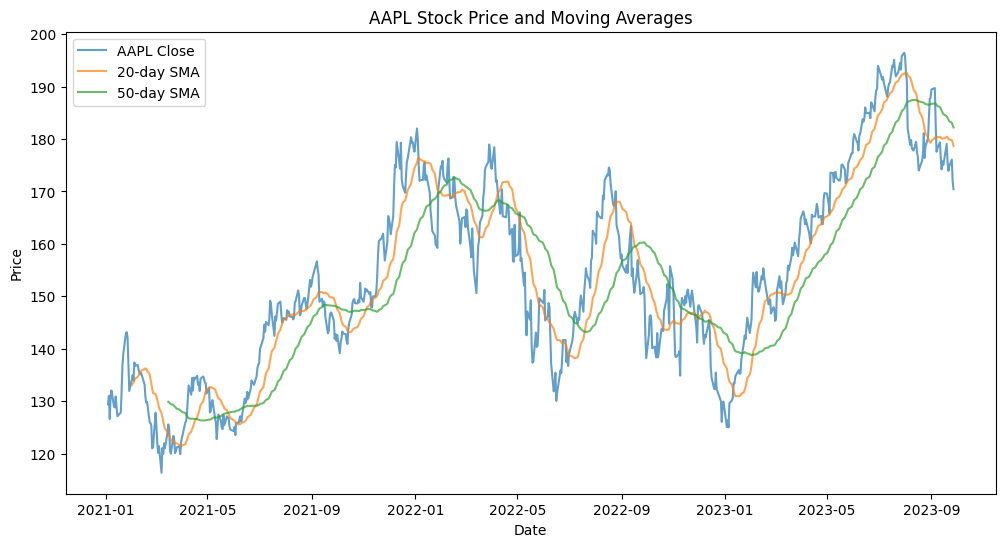

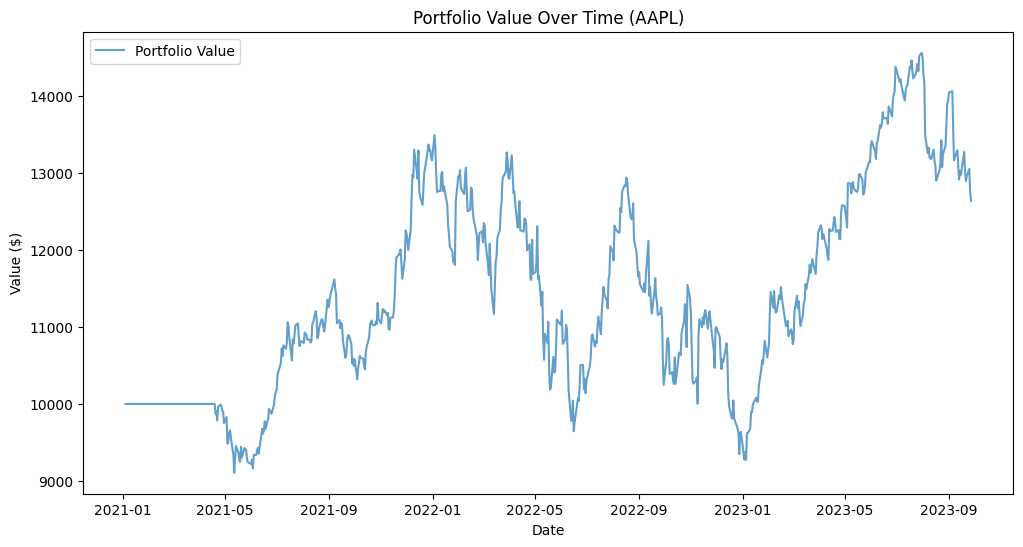

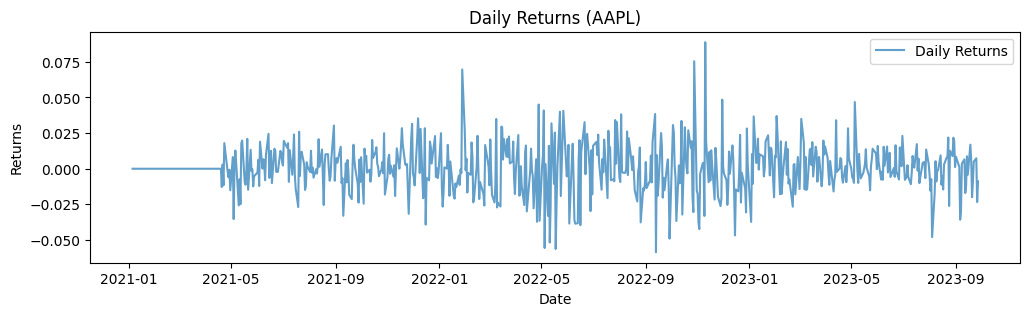

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbol
stock_symbol = 'AAPL'

# Download data using yfinance
start_date = '2021-01-01'
end_date = '2023-09-28'

# Download the data for the stock_symbol
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate the 20-day and 50-day moving averages
short_window = 20
long_window = 50

stock_data['SMA20'] = stock_data['Close'].rolling(window=short_window).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=long_window).mean()

# Create a DataFrame to store the trading signals
signals = pd.DataFrame(index=stock_data.index)
signals['Signal'] = 0.0  # Initialize all signals to 0

# Create a signal when the short-term SMA crosses above the long-term SMA
signals['Signal'][short_window:] = np.where(
    stock_data['SMA20'][short_window:] > stock_data['SMA50'][short_window:], 1.0, 0.0
)

# Initialize capital and position
initial_capital = 10000.0  # Updated initial capital to $10,000
position = 0
cash = initial_capital

# Implement the trading strategy
portfolio_value = []
for i in range(len(signals)):
    if signals['Signal'][i] == 1.0:  # Buy signal
        if cash > 0:
            shares_to_buy = cash // stock_data['Close'].iloc[i]
            position += shares_to_buy
            cash -= shares_to_buy * stock_data['Close'].iloc[i]
    elif signals['Signal'][i] == -1.0:  # Sell signal
        if position > 0:
            cash += position * stock_data['Close'].iloc[i]
            position = 0

    # Calculate portfolio value at each step
    portfolio_value.append(cash + position * stock_data['Close'].iloc[i])

# Calculate daily returns
returns = pd.Series(portfolio_value).pct_change()

# Plot portfolio value and daily returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_symbol} Close', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day SMA', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day SMA', alpha=0.7)
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, portfolio_value, label='Portfolio Value', alpha=0.7)
plt.title(f'Portfolio Value Over Time ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()

plt.figure(figsize=(12, 3))
plt.plot(signals.index, returns, label='Daily Returns', alpha=0.7)
plt.title(f'Daily Returns ({stock_symbol})')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()


In [ ]:
# Calculate the final portfolio value
AAPL_value = portfolio_value[-1]

# Print the final portfolio value
print(f"Final Portfolio Value: ${AAPL_value:.2f}")


Final Portfolio Value: $12633.66


# **Total value of the portfolio**

## **The total value of the portfolio using the golden and death cross for each stock**

In [ ]:
final_portfolio_value = (MSFT_value + AMZN_value + TSLA_value + GOOGL_value + JNJ_value + CSCO_value + IVZ_value + CZR_value + CCL_value + AAPL_value)
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
cash = 100000
print(f"The difference between the portfolio and the initial amount of $100,000: ${final_portfolio_value-cash:.2f}")

Final Portfolio Value: $91457.85
The difference between the portfolio and the initial amount of $100,000: $-8542.15


## **Total value of the portfolio buying at open and selling at close**

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


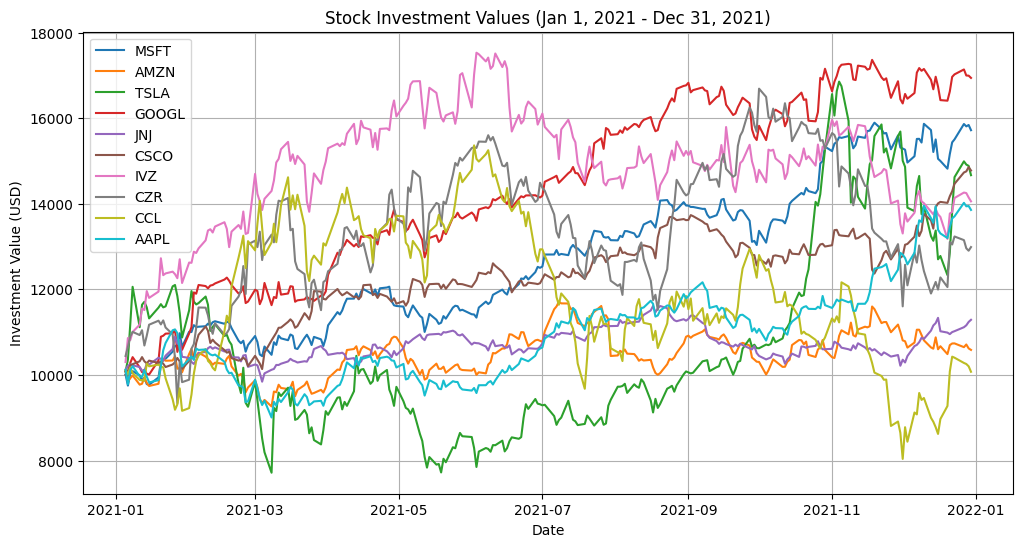

Total investment value for MSFT on Dec 31, 2021: $15717.96
Total investment value for AMZN on Dec 31, 2021: $10584.50
Total investment value for TSLA on Dec 31, 2021: $14666.81
Total investment value for GOOGL on Dec 31, 2021: $16939.69
Total investment value for JNJ on Dec 31, 2021: $11287.70
Total investment value for CSCO on Dec 31, 2021: $14776.78
Total investment value for IVZ on Dec 31, 2021: $14055.25
Total investment value for CZR on Dec 31, 2021: $12987.43
Total investment value for CCL on Dec 31, 2021: $10073.60
Total investment value for AAPL on Dec 31, 2021: $13855.08


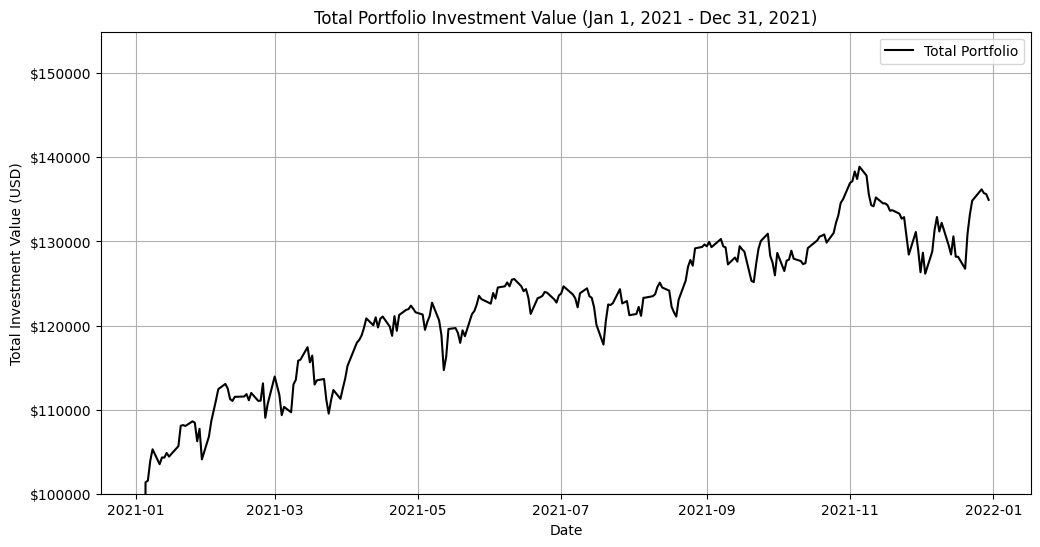

Total Investment Value on Dec 31, 2021: $134944.80
ROI: 1249.45%
CAGR: 1263.51%


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the stock symbols, date range, and common initial investment
stocks = ["MSFT", "AMZN", "TSLA", "GOOGL", "JNJ", "CSCO", "IVZ", "CZR", "CCL", "AAPL"]
start_date = "2021-01-01"
end_date = "2021-12-31"
common_initial_investment = 10000  # Initial investment amount for the entire portfolio

# Create a dictionary to store final investment values for each stock
final_values = {}

# Download historical data and calculate returns for each stock
for stock_symbol in stocks:
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    data['Daily Return'] = data['Adj Close'].pct_change()
    final_value = (1 + data['Daily Return']).cumprod() * common_initial_investment
    final_values[stock_symbol] = final_value

# Combine the final investment values for all stocks
total_investment_values = pd.DataFrame(final_values)
total_investment_values["Total Value"] = total_investment_values.sum(axis=1)

# Calculate the ROI
initial_investment = common_initial_investment
final_investment = total_investment_values["Total Value"].iloc[-1]
roi = (final_investment - initial_investment) / initial_investment

# Calculate the CAGR
years = len(total_investment_values) / 252  # Assuming 252 trading days in a year
cagr = (final_investment / initial_investment) ** (1 / years) - 1

# Plot the investment values for each stock
plt.figure(figsize=(12, 6))
plt.title("Stock Investment Values (Jan 1, 2021 - Dec 31, 2021)")
for stock_symbol in stocks:
    plt.plot(data.index, final_values[stock_symbol], label=stock_symbol)
plt.xlabel("Date")
plt.ylabel("Investment Value (USD)")
plt.grid(True)
plt.legend()

plt.show()

# Calculate and print the final total values for each stock
for stock_symbol in stocks:
    total_investment_value = final_values[stock_symbol][-1]
    print(f"Total investment value for {stock_symbol} on Dec 31, 2021: ${total_investment_value:.2f}")

# Plot the total investment value for the entire portfolio
plt.figure(figsize=(12, 6))
plt.title("Total Portfolio Investment Value (Jan 1, 2021 - Dec 31, 2021)")
plt.plot(total_investment_values.index, total_investment_values["Total Value"], label="Total Portfolio", color="black")
plt.xlabel("Date")
plt.ylabel("Total Investment Value (USD)")
plt.grid(True)
plt.ylim(100000, final_investment + 20000)  # Set y-axis limits to start at 100000
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x)}"))  # Format y-axis as integer dollars
plt.legend()

plt.show()

# Print the total investment value, ROI, and CAGR
print(f"Total Investment Value on Dec 31, 2021: ${final_investment:.2f}")
print(f"ROI: {roi * 100:.2f}%")
print(f"CAGR: {cagr * 100:.2f}%")

